In [1]:
# Import all Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import datasets
import matplotlib as mpl

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
df19 = pd.read_csv("Jan_2019_ontime.csv")
df19

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


In [3]:
df19.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [4]:
# create a copy
df = df19.copy()
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


In [5]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 21'], axis=1, errors='ignore')
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,1217305,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,1495503,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,1201602,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,1201602,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0


**Checking NULL values count**

In [7]:
df.isnull().sum()

,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
OP_CARRIER_AIRLINE_ID,0
OP_CARRIER,0
TAIL_NUM,2543
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN_AIRPORT_SEQ_ID,0
ORIGIN,0


**Cleaning the data --- Removing records containing NULL values**

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
OP_CARRIER_AIRLINE_ID,0
OP_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN_AIRPORT_SEQ_ID,0
ORIGIN,0


**DATA CLEANING - Dropping columns that are redundant**

In [10]:
# Dropping the redundant columns
df = df.drop(['OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID'], axis=1)

In [11]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,N8688C,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,N348PQ,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,N8896A,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,N8886A,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,N8974C,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


**VISUALIZATIONS**

In [12]:
df.OP_UNIQUE_CARRIER.unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'YX', 'HA',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

In [13]:
# The data consist of 17 different airlines.
df.OP_UNIQUE_CARRIER.unique().shape

(17,)

In [14]:
# Top 10 airlines and the percentage of delayed flights (Departure) vs Total flights.

df_air = pd.DataFrame(df.groupby(["OP_UNIQUE_CARRIER","DEP_DEL15"])["ORIGIN"].count().unstack("DEP_DEL15").reset_index().values,columns =[ "Airline","Not_Delayed","Delayed"])
df_air["Percent Of Delayed"] = df_air.Delayed / ( df_air.Delayed + df_air.Not_Delayed)
df_air.sort_values(by = "Not_Delayed",ascending=False,inplace=True)
df_air = df_air.head(10)
df_air

,Airline,Not_Delayed,Delayed,Percent Of Delayed
14,WN,88769,18466,0.172201
4,DL,63990,9413,0.128237
1,AA,63361,11993,0.159155
12,OO,49190,12580,0.203659
13,UA,37768,8358,0.181199
16,YX,19779,4790,0.194961
11,OH,19068,3301,0.14757
9,MQ,19016,4694,0.197976
2,AS,17472,2732,0.135221
3,B6,17074,6321,0.270186


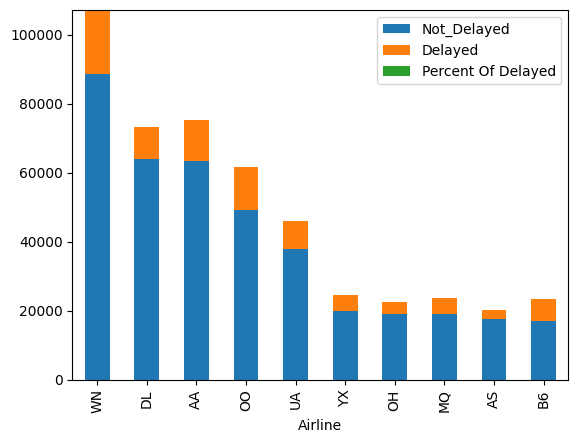

In [15]:
df_air.set_index("Airline").plot(kind = 'bar',stacked = True)
plt.show()

In [16]:
# Top 10 origin airports and the percentage of delayed flight (departure) vs total flights

df_org = pd.DataFrame(df.groupby(["ORIGIN","DEP_DEL15"])["ORIGIN"].count().unstack("DEP_DEL15").reset_index().values,columns = ["Origin","Not_Delayed","Delayed"])
df_org["Percent Of Delayed"] = df_org.Delayed / ( df_org.Delayed + df_org.Not_Delayed)
df_org.sort_values(by = "Not_Delayed",ascending = False,inplace = True)
df_org.head(10)

,Origin,Not_Delayed,Delayed,Percent Of Delayed
19,ATL,26665.0,4118.0,0.133775
89,DFW,18677.0,4028.0,0.177406
238,ORD,16776.0,6560.0,0.281111
68,CLT,16101.0,2671.0,0.142286
88,DEN,14805.0,3415.0,0.187431
180,LAX,14643.0,3017.0,0.170838
251,PHX,12417.0,2123.0,0.146011
156,IAH,12381.0,2082.0,0.143954
178,LAS,10844.0,2201.0,0.168724
297,SFO,10111.0,2967.0,0.22687


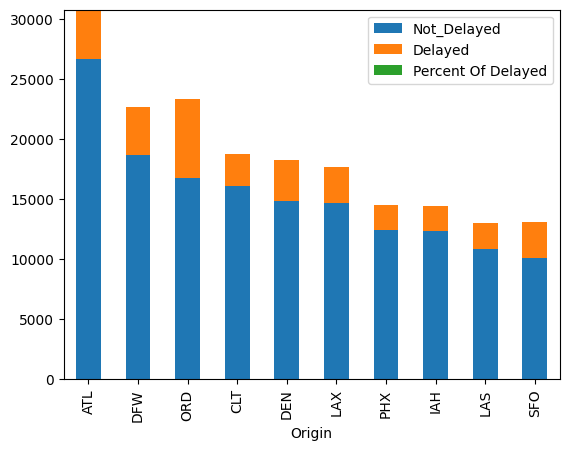

In [17]:
df_org.head(10).set_index("Origin").plot(kind = 'bar',stacked = True)
plt.show()

In [18]:
# Top 10 departure time blocks and the percentage of delayed flights vs total flights

df_depblk = pd.DataFrame(df.groupby(["DEP_TIME_BLK","DEP_DEL15"])["ORIGIN"].count().unstack("DEP_DEL15").reset_index().values,columns = ["DEP_TIME_BLK","Not_Delayed","Delayed"])
df_depblk["PercentOfDelayed"] = df_depblk.Delayed / ( df_depblk.Delayed + df_depblk.Not_Delayed)
df_depblk.sort_values(by = "PercentOfDelayed",ascending = False,inplace = True)
df_depblk.head(10)

,DEP_TIME_BLK,Not_Delayed,Delayed,PercentOfDelayed
14,1900-1959,23195,7566,0.245961
13,1800-1859,25482,7894,0.236517
15,2000-2059,19431,5750,0.228347
16,2100-2159,13244,3889,0.226989
12,1700-1759,27955,8143,0.22558
11,1600-1659,26913,7342,0.214334
9,1400-1459,27507,7279,0.209251
10,1500-1559,27704,7240,0.207189
8,1300-1359,26108,6402,0.196924
17,2200-2259,10260,2336,0.185456


In [19]:
df_depblk.sort_values(by = "Not_Delayed",ascending = False,inplace = True)
df_depblk = df_depblk.head(10)
df_depblk

,DEP_TIME_BLK,Not_Delayed,Delayed,PercentOfDelayed
1,0600-0659,37791,2825,0.069554
2,0700-0759,33903,3366,0.090316
3,0800-0859,33814,4054,0.107056
6,1100-1159,29788,5983,0.167258
7,1200-1259,29357,6497,0.181207
5,1000-1059,29165,5465,0.157811
4,0900-0959,29121,4371,0.130509
12,1700-1759,27955,8143,0.22558
10,1500-1559,27704,7240,0.207189
9,1400-1459,27507,7279,0.209251


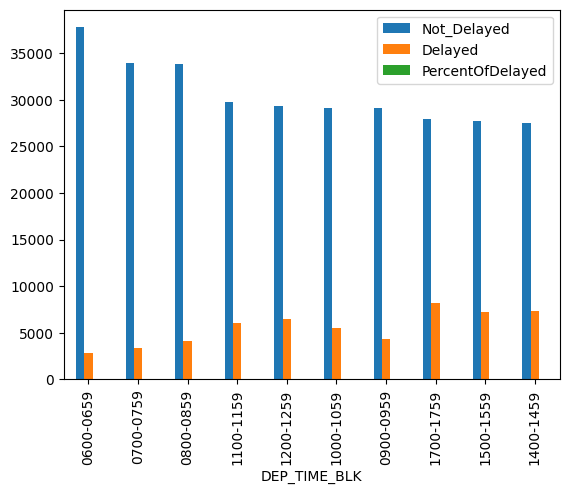

In [20]:
df_depblk.set_index("DEP_TIME_BLK").plot(kind='bar')

plt.show()

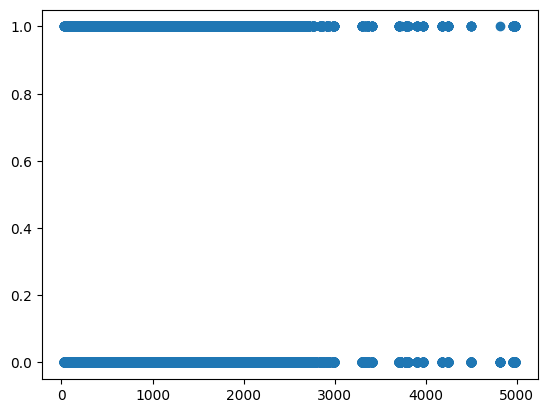

In [21]:
'''
This is a scatterplot between distance and delay. We plot this scatterplot to see
if there is a relationship between the two.
From this scatterplot, we see that there is no clear relationship between the distance
and the delay as a result of which we decide to drop the distance column.
'''
plt.scatter(df["DISTANCE"],df["DEP_DEL15"])
plt.show()

In [22]:
# Relationship between the day of the week and the delay in departure

df_dow=pd.DataFrame(df.groupby(["DAY_OF_WEEK","DEP_DEL15"])["ORIGIN"].count().unstack("DEP_DEL15").reset_index().values,columns = ["DOW","Not_Delayed","Delayed"])
df_dow["PercentOfDelayed"] = df_dow.Delayed / ( df_dow.Delayed + df_dow.Not_Delayed)
df_dow.sort_values(by = "Not_Delayed", ascending = False, inplace = True)
df_dow.head(10)

,DOW,Not_Delayed,Delayed,PercentOfDelayed
3,4,77444,19029,0.197247
2,3,76585,16758,0.179531
1,2,75431,14251,0.158906
4,5,65131,13523,0.171930
0,1,63320,13485,0.175575
6,7,58367,12493,0.176305
5,6,51380,8766,0.145745


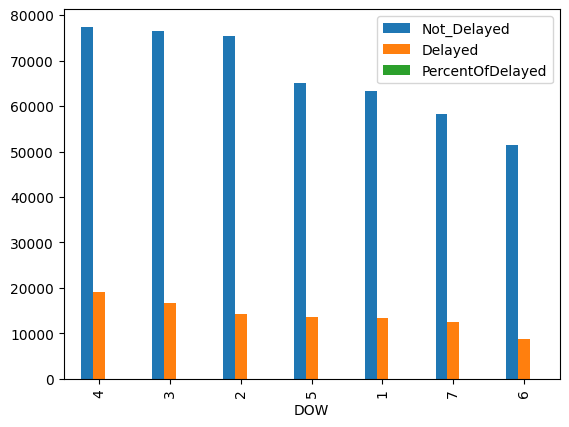

In [23]:
df_dow.set_index("DOW").plot(kind='bar')
plt.show()

**Cancelled flights by Origin Airport**

In [24]:
# Bar chart - Delayed (departure time) flights by origin airport

plot3 = df.groupby('ORIGIN')['DEP_DEL15'].count().sort_values(ascending=False)
# cap to above 400
plot3 = plot3[plot3>400]
fig3 = px.bar(plot3, x = plot3.index, y = plot3.values, color_discrete_sequence = ['#6ec8ba'],
             title = "Delayed (departure time) flights by origin airport", labels = {"ORIGIN":"Origin airport","y":"Count"})
fig3.layout.template = 'plotly_white'
fig3.update_xaxes(tickangle=45)
fig3.show()

In [25]:
# Bar chart - Delayed (arrival time) flights by destination airport

plot4 = df.groupby('DEST')['ARR_DEL15'].count().sort_values(ascending=False)
#cap to above 400
plot4 = plot4[plot4>400]
fig4 = px.bar(plot4, x = plot4.index, y = plot4.values, color_discrete_sequence = ['#1A7065'],
             title = "Delayed (arrival time) flights by destination airport", labels = {"DEST":"Destination airport","y":"Count"})
fig4.layout.template = 'plotly_white'
fig4.update_xaxes(tickangle=45)
fig4.show()

In [26]:
# Donut chart - top 10 Airlines with most delayed flights (departure)

plot6 = df.groupby('OP_UNIQUE_CARRIER')['DEP_DEL15'].sum().sort_values().head(10)
fig6 = px.pie(names = plot6.index, values = list(map(int,plot6.values)),
              color_discrete_sequence = px.colors.qualitative.T10, hole=0.5, title='Airlines with most delayed flights (departure)')
fig6.show()

In [27]:
# Pie Chart - Top 10 Airports with most delayed flights (departure)

plot6 = df.groupby('ORIGIN')['DEP_DEL15'].sum().sort_values().head(10)
fig6 = px.pie(names = plot6.index, values = list(map(int,plot6.values)),
              color_discrete_sequence = px.colors.qualitative.T10, hole=0.0, title='Airports with most delayed flights (departure)')
fig6.show()

In [28]:
# Donut chart - Top 10 Airlines with most delayed flights (arrival)

plot6 = df.groupby('OP_UNIQUE_CARRIER')['ARR_DEL15'].sum().sort_values().head(10)
fig6 = px.pie(names = plot6.index, values = list(map(int,plot6.values)),
              color_discrete_sequence = px.colors.qualitative.T10, hole=0.5, title='Airlines with most delayed flights (arrival)')
fig6.show()

In [29]:
# Pie Chart - Top 10 Airports with most delayed flights (arrival)

plot6 = df.groupby('DEST')['ARR_DEL15'].sum().sort_values().head(10)
fig6 = px.pie(names = plot6.index, values = list(map(int,plot6.values)),
              color_discrete_sequence = px.colors.qualitative.T10, hole=0.0, title='Airports with most delayed flights (arrival)')
fig6.show()

**Converting Categorical variables to Numerical values** --- Using LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
# Here, we are using LabelEncoder() to convert our categorical variables into numerical variables so that we can standardize data

le = LabelEncoder()
OP_UNIQUE_encoded = le.fit_transform(df['OP_UNIQUE_CARRIER'])
TAIL_NUM_encoded = le.fit_transform(df['TAIL_NUM'])
ORIGIN_encoded = le.fit_transform(df['ORIGIN'])
DEST_encoded = le.fit_transform(df['DEST'])

In [32]:
df['OP_UNIQUE_encoded'] = OP_UNIQUE_encoded
df['TAIL_NUM_encoded'] = TAIL_NUM_encoded
df['ORIGIN_encoded'] = ORIGIN_encoded
df['DEST_encoded'] = DEST_encoded

In [33]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,OP_UNIQUE_encoded,TAIL_NUM_encoded,ORIGIN_encoded,DEST_encoded
0,1,2,9E,N8688C,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,0,4316,128,19
1,1,2,9E,N348PQ,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,0,1396,225,80
2,1,2,9E,N8896A,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,0,4472,95,80
3,1,2,9E,N8886A,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,0,4468,325,19
4,1,2,9E,N8974C,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,0,4529,19,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,N776UA,GUM,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,13,3426,139,145
583981,31,4,UA,N36280,GUM,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,13,1462,139,312
583982,31,4,UA,N36280,SPN,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,13,1462,312,139
583983,31,4,UA,N39726,SPN,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,13,1677,312,139


In [34]:
df = df.drop(['OP_UNIQUE_CARRIER','TAIL_NUM','ORIGIN','DEST'],axis=1)

In [35]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,OP_UNIQUE_encoded,TAIL_NUM_encoded,ORIGIN_encoded,DEST_encoded
0,1,2,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,0,4316,128,19
1,1,2,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,0,1396,225,80
2,1,2,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,0,4472,95,80
3,1,2,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,0,4468,325,19
4,1,2,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,0,4529,19,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,13,3426,139,145
583981,31,4,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,13,1462,139,312
583982,31,4,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,13,1462,312,139
583983,31,4,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,13,1677,312,139


In [36]:
DEP_TIME_BLK_encoded = le.fit_transform(df['DEP_TIME_BLK'])

In [37]:
blocks = []
for hour in range(0,24):
    hour_part = ('%02d' %(hour))
    blocks.append(hour_part + '00-' + hour_part + '59')
blocks

def get_arrival_time_blk(arr_time):
    arr_hour = str('%04d' %(arr_time))[:2]
    arr_block = None
    for block in blocks:
        #print (block,arr_hour)
        if block.startswith(arr_hour):
            arr_block = block
            break
    if arr_block == None and str(arr_time) == '2400.0':
        arr_block = '0000-0059'
        #print('Cannot find block for #' + str(arr_time) + '#: set block to #' + arr_block + '#')
    return arr_block

df['ARR_TIME_BLK'] = df.ARR_TIME.apply(get_arrival_time_blk)
# drop the no more useful ARR_TIME
df.drop(['ARR_TIME'], inplace=True, axis=1)

In [38]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,OP_UNIQUE_encoded,TAIL_NUM_encoded,ORIGIN_encoded,DEST_encoded,ARR_TIME_BLK
0,1,2,601.0,0.0,0600-0659,0.0,0.0,0.0,300.0,0,4316,128,19,0700-0759
1,1,2,1359.0,0.0,1400-1459,0.0,0.0,0.0,596.0,0,1396,225,80,1600-1659
2,1,2,1215.0,0.0,1200-1259,0.0,0.0,0.0,229.0,0,4472,95,80,1300-1359
3,1,2,1521.0,0.0,1500-1559,0.0,0.0,0.0,223.0,0,4468,325,19,1600-1659
4,1,2,1847.0,0.0,1900-1959,0.0,0.0,0.0,579.0,0,4529,19,120,1900-1959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,749.0,0.0,0700-0759,0.0,0.0,0.0,3801.0,13,3426,139,145,1800-1859
583981,31,4,717.0,0.0,0700-0759,0.0,0.0,0.0,129.0,13,1462,139,312,0700-0759
583982,31,4,857.0,0.0,0900-0959,0.0,0.0,0.0,129.0,13,1462,312,139,0900-0959
583983,31,4,1820.0,0.0,1800-1859,0.0,0.0,0.0,129.0,13,1677,312,139,1800-1859


In [39]:
DEP_TIME_BLK_encoded = le.fit_transform(df['DEP_TIME_BLK'])
ARR_TIME_BLK_encoded = le.fit_transform(df['ARR_TIME_BLK'])

In [40]:
df['DEP_TIME_BLK_encoded'] = DEP_TIME_BLK_encoded
df['ARR_TIME_BLK_encoded'] = ARR_TIME_BLK_encoded

In [41]:
df = df.drop(['DEP_TIME_BLK','ARR_TIME_BLK','DEP_TIME'],axis=1)

In [42]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,OP_UNIQUE_encoded,TAIL_NUM_encoded,ORIGIN_encoded,DEST_encoded,DEP_TIME_BLK_encoded,ARR_TIME_BLK_encoded
0,1,2,0.0,0.0,0.0,0.0,300.0,0,4316,128,19,1,7
1,1,2,0.0,0.0,0.0,0.0,596.0,0,1396,225,80,9,16
2,1,2,0.0,0.0,0.0,0.0,229.0,0,4472,95,80,7,13
3,1,2,0.0,0.0,0.0,0.0,223.0,0,4468,325,19,10,16
4,1,2,0.0,0.0,0.0,0.0,579.0,0,4529,19,120,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,0.0,0.0,0.0,0.0,3801.0,13,3426,139,145,2,18
583981,31,4,0.0,0.0,0.0,0.0,129.0,13,1462,139,312,2,7
583982,31,4,0.0,0.0,0.0,0.0,129.0,13,1462,312,139,4,9
583983,31,4,0.0,0.0,0.0,0.0,129.0,13,1677,312,139,13,18


<ipython-input-43-5cd153eef2da>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-43-5cd153eef2da>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




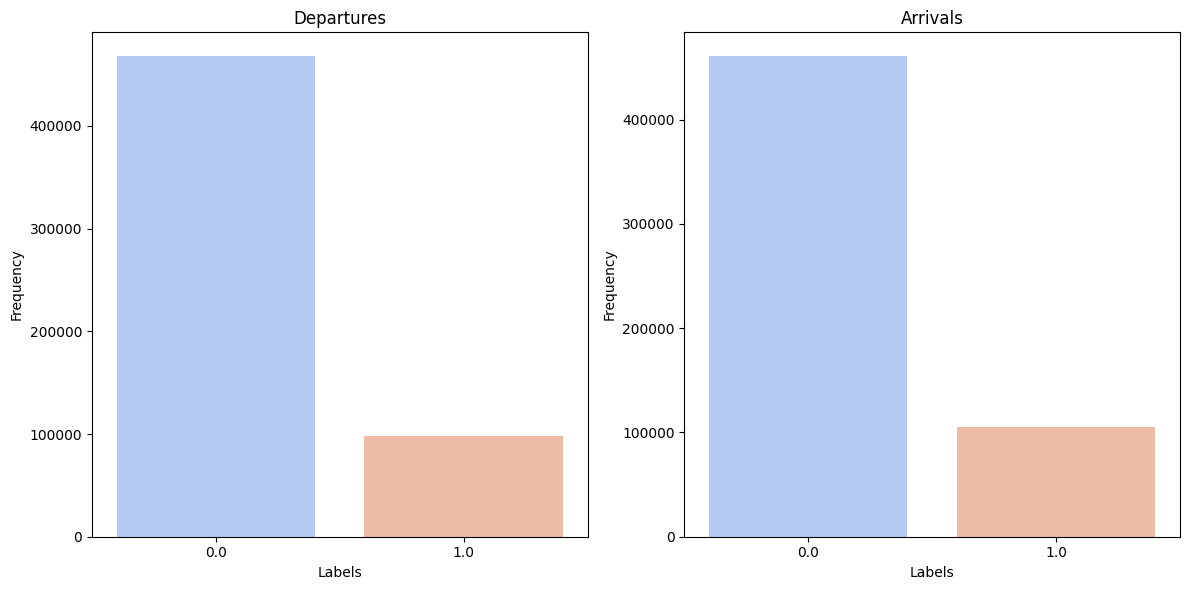

In [43]:
# The concentration of delay and timely arrivals both on departure and on arrival

# Precompute counts for DEP_DEL15 and ARR_DEL15
dep_counts = df['DEP_DEL15'].value_counts().reset_index()
dep_counts.columns = ['Labels', 'Freq']

arr_counts = df['ARR_DEL15'].value_counts().reset_index()
arr_counts.columns = ['Labels', 'Freq']

# Plotting
f, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 6))

# Departure plot
sns.barplot(x='Labels', y='Freq', data=dep_counts, ax=ax, palette='coolwarm')
ax.set_title('Departures')
ax.set_xlabel('Labels')
ax.set_ylabel('Frequency')

# Arrival plot
sns.barplot(x='Labels', y='Freq', data=arr_counts, ax=ax1, palette='coolwarm')
ax1.set_title('Arrivals')
ax1.set_xlabel('Labels')
ax1.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**PLOTTING PAIRPLOT**

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

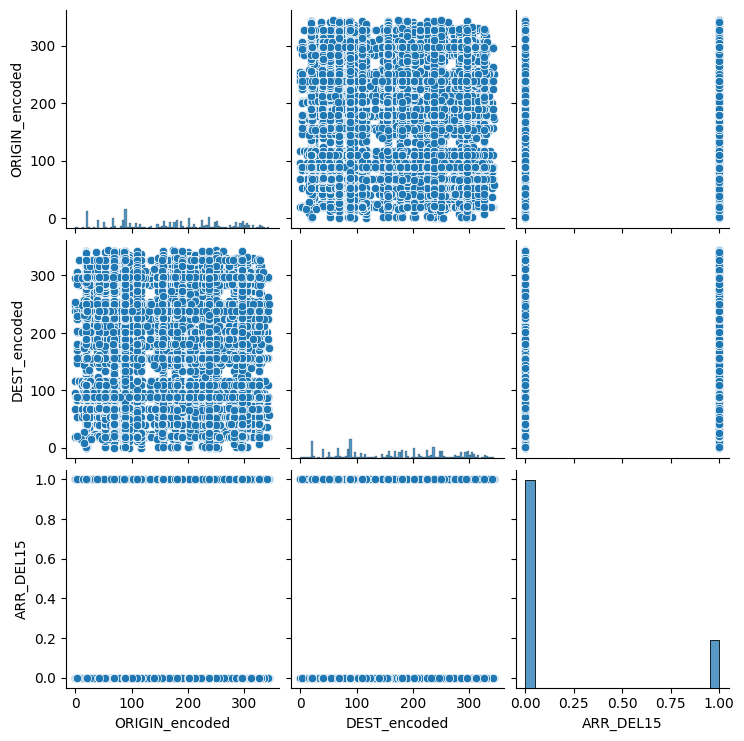

In [45]:
sns.pairplot(df,vars=['ORIGIN_encoded','DEST_encoded','ARR_DEL15'])

**Histogram for frequency distribution of variables**

array([[<Axes: title={'center': 'DAY_OF_MONTH'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>,
        <Axes: title={'center': 'DEP_DEL15'}>,
        <Axes: title={'center': 'ARR_DEL15'}>],
       [<Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'DIVERTED'}>,
        <Axes: title={'center': 'DISTANCE'}>,
        <Axes: title={'center': 'OP_UNIQUE_encoded'}>],
       [<Axes: title={'center': 'TAIL_NUM_encoded'}>,
        <Axes: title={'center': 'ORIGIN_encoded'}>,
        <Axes: title={'center': 'DEST_encoded'}>,
        <Axes: title={'center': 'DEP_TIME_BLK_encoded'}>],
       [<Axes: title={'center': 'ARR_TIME_BLK_encoded'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

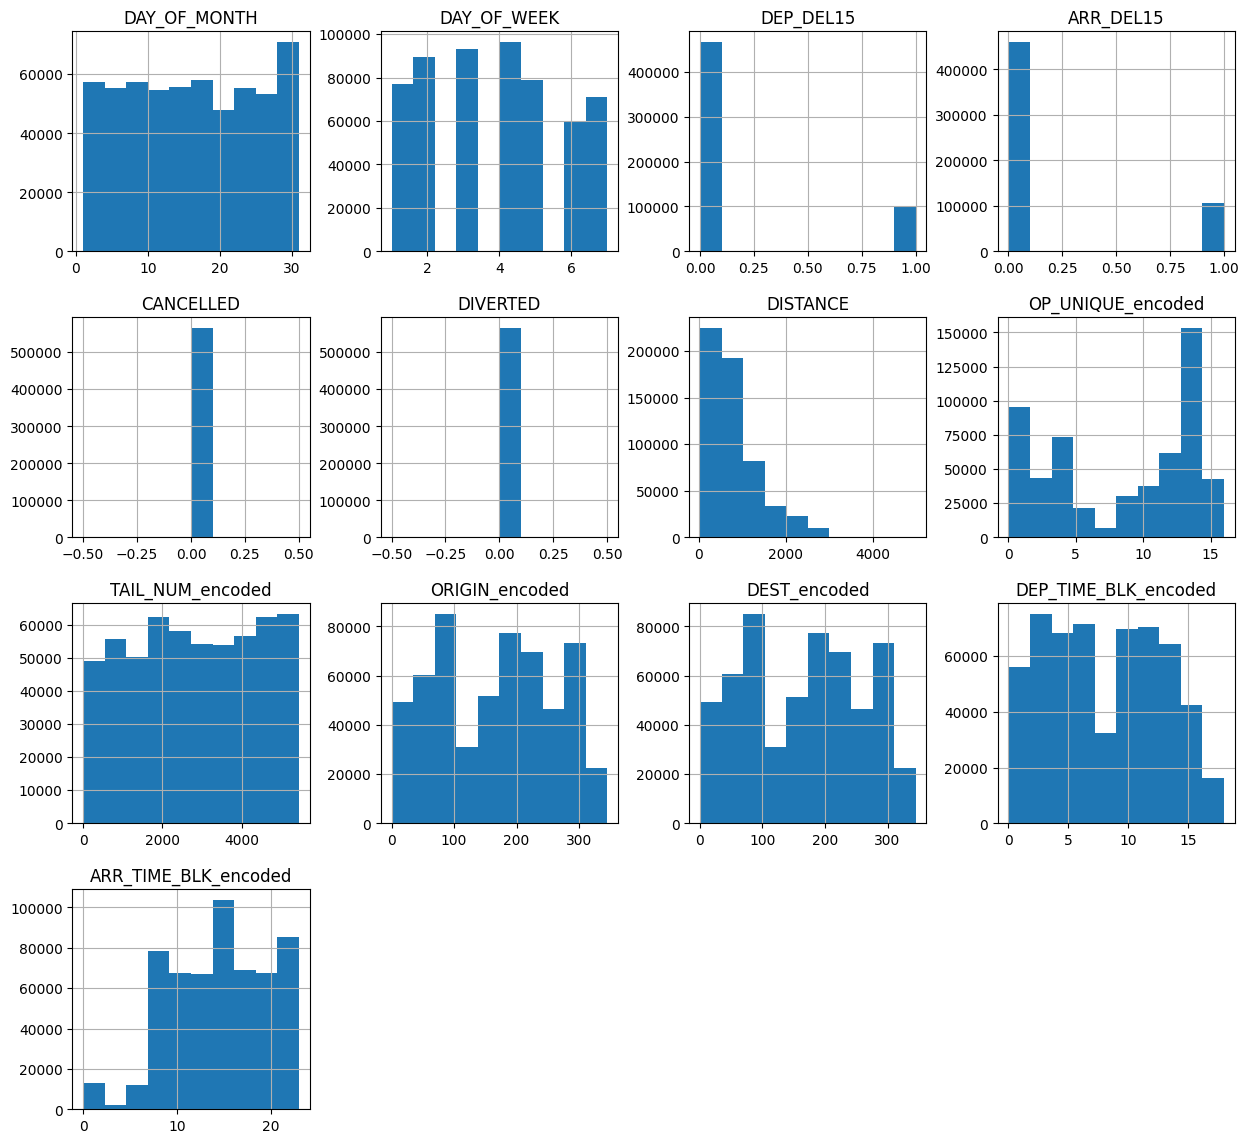

In [46]:
df.hist(figsize= (15, 14))

**Splitting the data where y is the target variable 'ARR_DEL15'**

In [47]:
x = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']

In [48]:
x

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,CANCELLED,DIVERTED,DISTANCE,OP_UNIQUE_encoded,TAIL_NUM_encoded,ORIGIN_encoded,DEST_encoded,DEP_TIME_BLK_encoded,ARR_TIME_BLK_encoded
0,1,2,0.0,0.0,0.0,300.0,0,4316,128,19,1,7
1,1,2,0.0,0.0,0.0,596.0,0,1396,225,80,9,16
2,1,2,0.0,0.0,0.0,229.0,0,4472,95,80,7,13
3,1,2,0.0,0.0,0.0,223.0,0,4468,325,19,10,16
4,1,2,0.0,0.0,0.0,579.0,0,4529,19,120,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,0.0,0.0,0.0,3801.0,13,3426,139,145,2,18
583981,31,4,0.0,0.0,0.0,129.0,13,1462,139,312,2,7
583982,31,4,0.0,0.0,0.0,129.0,13,1462,312,139,4,9
583983,31,4,0.0,0.0,0.0,129.0,13,1677,312,139,13,18


In [49]:
y = y.astype(int)
y

,ARR_DEL15
0,0
1,0
2,0
3,0
4,0
...,...
583980,0
583981,0
583982,0
583983,0


**Standardizing the data**

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [52]:
x_standardized = scaler.fit_transform(x)

In [53]:
x_standardized

array([[-1.64972961, -0.95758013, -0.4584834 , ..., -1.58857327,
        -1.46125706, -1.43966146],
       [-1.64972961, -0.95758013, -0.4584834 , ..., -0.93556167,
         0.20863973,  0.27937321],
       [-1.64972961, -0.95758013, -0.4584834 , ..., -0.93556167,
        -0.20883447, -0.29363835],
       ...,
       [ 1.69835414,  0.08431028, -0.4584834 , ..., -0.30396028,
        -0.83504576, -1.05765376],
       [ 1.69835414,  0.08431028, -0.4584834 , ..., -0.30396028,
         1.04358813,  0.66138091],
       [ 1.69835414,  0.08431028, -0.4584834 , ...,  1.54802343,
         0.62611393,  0.47037706]])

In [54]:
x_standardized = pd.DataFrame(x_standardized, columns = x.columns)
x_standardized

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,CANCELLED,DIVERTED,DISTANCE,OP_UNIQUE_encoded,TAIL_NUM_encoded,ORIGIN_encoded,DEST_encoded,DEP_TIME_BLK_encoded,ARR_TIME_BLK_encoded
0,-1.649730,-0.95758,-0.458483,0.0,0.0,-0.848174,-1.589141,0.960173,-0.422122,-1.588573,-1.461257,-1.439661
1,-1.649730,-0.95758,-0.458483,0.0,0.0,-0.348449,-1.589141,-0.896243,0.616432,-0.935562,0.208640,0.279373
2,-1.649730,-0.95758,-0.458483,0.0,0.0,-0.968040,-1.589141,1.059351,-0.775444,-0.935562,-0.208834,-0.293638
3,-1.649730,-0.95758,-0.458483,0.0,0.0,-0.978170,-1.589141,1.056808,1.687106,-1.588573,0.417377,0.279373
4,-1.649730,-0.95758,-0.458483,0.0,0.0,-0.377149,-1.589141,1.095589,-1.589157,-0.507357,1.252325,0.852385
...,...,...,...,...,...,...,...,...,...,...,...,...
565958,1.698354,0.08431,-0.458483,0.0,0.0,5.062426,0.841210,0.394347,-0.304348,-0.239730,-1.252520,0.661381
565959,1.698354,0.08431,-0.458483,0.0,0.0,-1.136866,0.841210,-0.854283,-0.304348,1.548023,-1.252520,-1.439661
565960,1.698354,0.08431,-0.458483,0.0,0.0,-1.136866,0.841210,-0.854283,1.547919,-0.303960,-0.835046,-1.057654
565961,1.698354,0.08431,-0.458483,0.0,0.0,-1.136866,0.841210,-0.717595,1.547919,-0.303960,1.043588,0.661381


**Principal Component Analysis**

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # Using PCA on standardized data.
X_scaled = StandardScaler().fit_transform(x_standardized)

In [56]:
pca_ss = PCA(n_components=2)
pca_ss.fit_transform(X_scaled)
a=pca_ss.explained_variance_ratio_  # calculates proportion variance.
print(a)

[0.16886656 0.12088948]


In [57]:
b=pca_ss.explained_variance_   # calculates explained variance.
print(b)

[1.68866859 1.20889695]


In [58]:
c = np.cumsum(pca_ss.explained_variance_ratio_)  # calculates cummulative proportion of variance
c

array([0.16886656, 0.28975604])

We find the proportion variance, explained variance and cumulative proportion variance using PCA.
Running our Data Mining models without using PCA, we get accuracies of more than 90%. Thus, we can conclude that after cleaning our data, our models fit the dataset well, as a result of which we need not perform dimension reduction using PCA before running our Data Mining models.
Hence, we do not use the principal component values for our models.


**FINDING CORRELATION**

In [59]:
from numpy import cov

In [60]:
x_corr = x_standardized.corr(method='pearson', min_periods=1)
x_corr

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,CANCELLED,DIVERTED,DISTANCE,OP_UNIQUE_encoded,TAIL_NUM_encoded,ORIGIN_encoded,DEST_encoded,DEP_TIME_BLK_encoded,ARR_TIME_BLK_encoded
DAY_OF_MONTH,1.000000,-0.021999,0.027762,NaN,NaN,-0.016014,-0.009234,0.002330,-0.006729,-0.006257,-0.006699,0.003526
DAY_OF_WEEK,-0.021999,1.000000,-0.003089,NaN,NaN,0.017024,0.002350,-0.005131,0.007340,0.007054,0.005687,0.005529
DEP_DEL15,0.027762,-0.003089,1.000000,NaN,NaN,0.011393,0.015895,-0.006845,0.004213,0.012643,0.133099,0.087369
CANCELLED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIVERTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTANCE,-0.016014,0.017024,0.011393,NaN,NaN,1.000000,-0.162142,-0.058460,0.096434,0.096058,-0.018876,0.020652
OP_UNIQUE_encoded,-0.009234,0.002350,0.015895,NaN,NaN,-0.162142,1.000000,-0.045167,0.039251,0.039465,-0.000950,0.014545
TAIL_NUM_encoded,0.002330,-0.005131,-0.006845,NaN,NaN,-0.058460,-0.045167,1.000000,-0.050118,-0.050089,0.005108,-0.000118
ORIGIN_encoded,-0.006729,0.007340,0.004213,NaN,NaN,0.096434,0.039251,-0.050118,1.000000,0.015567,-0.033811,-0.004534
DEST_encoded,-0.006257,0.007054,0.012643,NaN,NaN,0.096058,0.039465,-0.050089,0.015567,1.000000,0.026073,0.021171


**Since correlation values between the variables "CANCELLED" and "DIVERTED" ara all NaN, we drop the two columns from our dataframe.**

In [61]:
x_standardized = x_standardized.drop(['CANCELLED', 'DIVERTED'], axis=1)

In [62]:
x_corr = x_standardized.corr(method='pearson', min_periods=1)

Text(0.5, 1.0, 'Correlation Heatmap')

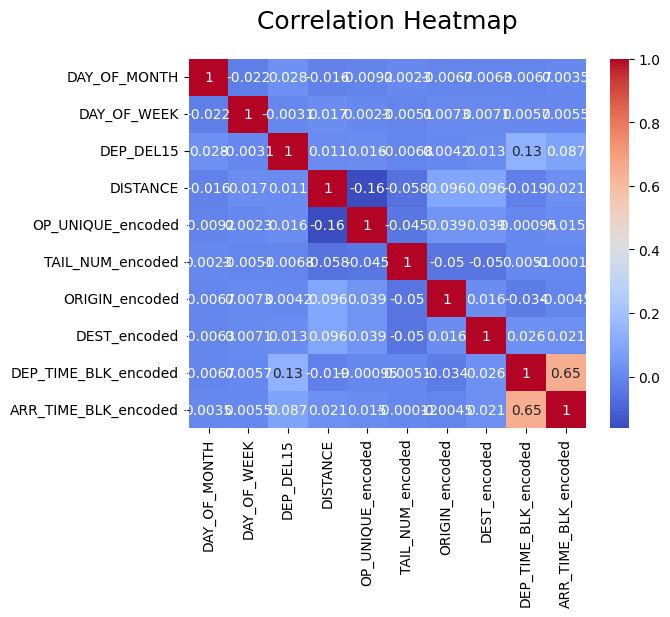

In [63]:
heatmap = sns.heatmap(x_corr, annot=True, cmap = 'coolwarm') # plot the annoted heatmap using seaborn library
sns.set(rc = {'figure.figsize':(30,15)})
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':18}, pad=22)

**SPLITTING DATA INTO TRAINING AND VALIDATION SETS**

In [64]:
# Importing necessary libraries for splitting the dataset

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [65]:
# Splitting the data into training and validation sets using the x_standardized and y datasets

x_train, x_test, y_train, y_test= train_test_split(x_standardized,y,  test_size=0.2, random_state=0)

In [66]:
x_train

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE,OP_UNIQUE_encoded,TAIL_NUM_encoded,ORIGIN_encoded,DEST_encoded,DEP_TIME_BLK_encoded,ARR_TIME_BLK_encoded
370887,0.582326,-1.478525,2.181104,-1.241538,0.654260,1.133099,0.755620,0.488218,1.461062,1.616400
353555,0.470723,1.647146,-0.458483,-0.954534,-1.402191,1.500568,0.884101,1.066294,1.043588,1.043389
480397,1.251943,1.647146,-0.458483,0.450098,0.841210,-0.487450,-0.936046,-0.849921,0.626114,0.470377
232467,-0.310496,1.647146,-0.458483,0.418021,1.028160,-1.374970,1.258837,1.366037,0.834851,1.043389
187100,-0.645304,0.084310,-0.458483,-0.402473,0.467310,-0.231239,-1.064526,-0.207614,1.461062,1.425396
...,...,...,...,...,...,...,...,...,...,...
359783,0.470723,1.647146,-0.458483,1.287476,1.028160,-1.083156,1.472972,-1.224600,-1.252520,-1.057654
152315,-0.756907,-0.436635,-0.458483,-0.618570,1.028160,0.466824,0.487951,0.359756,-0.626309,-0.675646
117952,-0.980113,-1.478525,-0.458483,-0.414291,0.654260,1.426820,0.991168,-0.849921,-0.626309,-0.675646
435829,0.917135,0.084310,-0.458483,0.774244,1.402060,-1.729723,0.884101,0.713025,-1.043783,-0.866650


In [67]:
x_test

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE,OP_UNIQUE_encoded,TAIL_NUM_encoded,ORIGIN_encoded,DEST_encoded,DEP_TIME_BLK_encoded,ARR_TIME_BLK_encoded
234668,-0.310496,1.647146,-0.458483,-0.090145,0.654260,-1.497671,-1.364315,1.258986,-0.626309,-0.675646
189496,-0.645304,0.084310,-0.458483,-0.669218,1.402060,-1.620373,-0.861098,0.466808,0.208640,0.279373
16925,-1.649730,-0.957580,-0.458483,0.242442,-0.841340,-0.857462,-1.353608,-1.588573,-0.000097,0.279373
100178,-1.091716,1.647146,-0.458483,-1.201020,0.467310,-0.339318,-1.064526,-1.556458,-0.417572,-0.484642
142933,-0.868510,-0.957580,-0.458483,-0.914016,-1.215241,-0.397172,-1.631984,-0.603703,1.461062,1.043389
...,...,...,...,...,...,...,...,...,...,...
404807,0.805532,-0.436635,-0.458483,-0.063133,0.093410,0.770717,-1.375022,0.027898,-1.043783,-0.675646
421717,0.805532,-0.436635,-0.458483,-0.351825,-0.841340,0.824756,-0.775444,-1.588573,1.043588,1.043389
116373,-0.980113,-1.478525,-0.458483,-0.409226,-0.280490,-1.754518,1.751347,1.076999,-0.000097,0.088369
138271,-0.868510,-0.957580,-0.458483,-1.212838,0.654260,1.350529,1.301664,0.755845,-0.417572,-0.675646


In [68]:
y_train

,ARR_DEL15
378797,1
360202,0
491556,0
235516,0
189007,0
...,...
367149,0
153895,0
119159,0
446490,0


In [69]:
y_test

,ARR_DEL15
237807,0
191475,0
17067,0
101090,0
144421,0
...,...
414545,0
432034,1
117565,0
139708,0


**MODEL 1 - DECISION TREE**

In [70]:
# Importing Necessary libraries for Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
#from sklearn.externals.six import StringIO
from six import StringIO
import pydotplus
from IPython.display import Image
dot_data = StringIO()
from sklearn import tree
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse , r2_score
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report , recall_score ,  precision_score
from sklearn.metrics import classification_report

In [71]:
# Fitting the Training Dataset on the Decision Tree Classifier

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [72]:
# Plotting the decision tree with depth = 6

tree.export_graphviz(clf, max_depth = 6, feature_names=x_test.columns, out_file= dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

True

In [73]:
graph

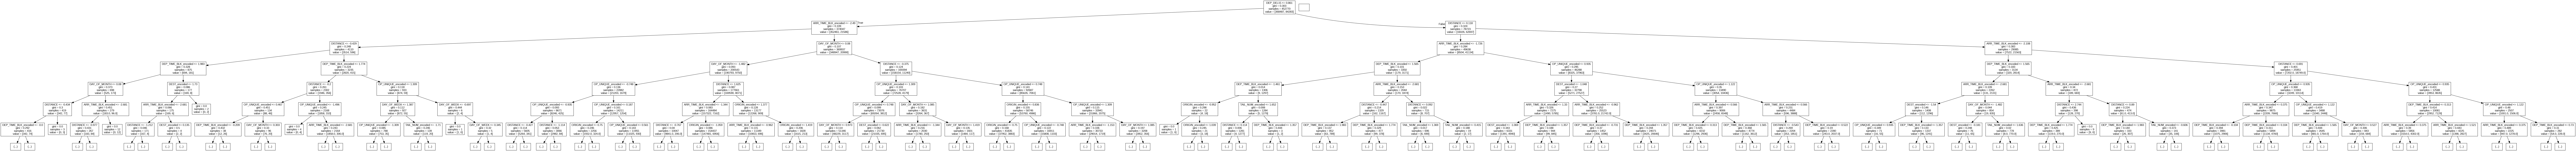

In [74]:
# Printing the image of the decision tree with depth=6

Image(graph.create_png())

In [75]:
y_pred_dt = clf.predict(x_test)

In [76]:
# The Decision Tree gives us an accuracy of 87.70 %

accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.8770065286722677

Avg Precision:0.6629208265614116
Avg Recall:0.6817899613162042


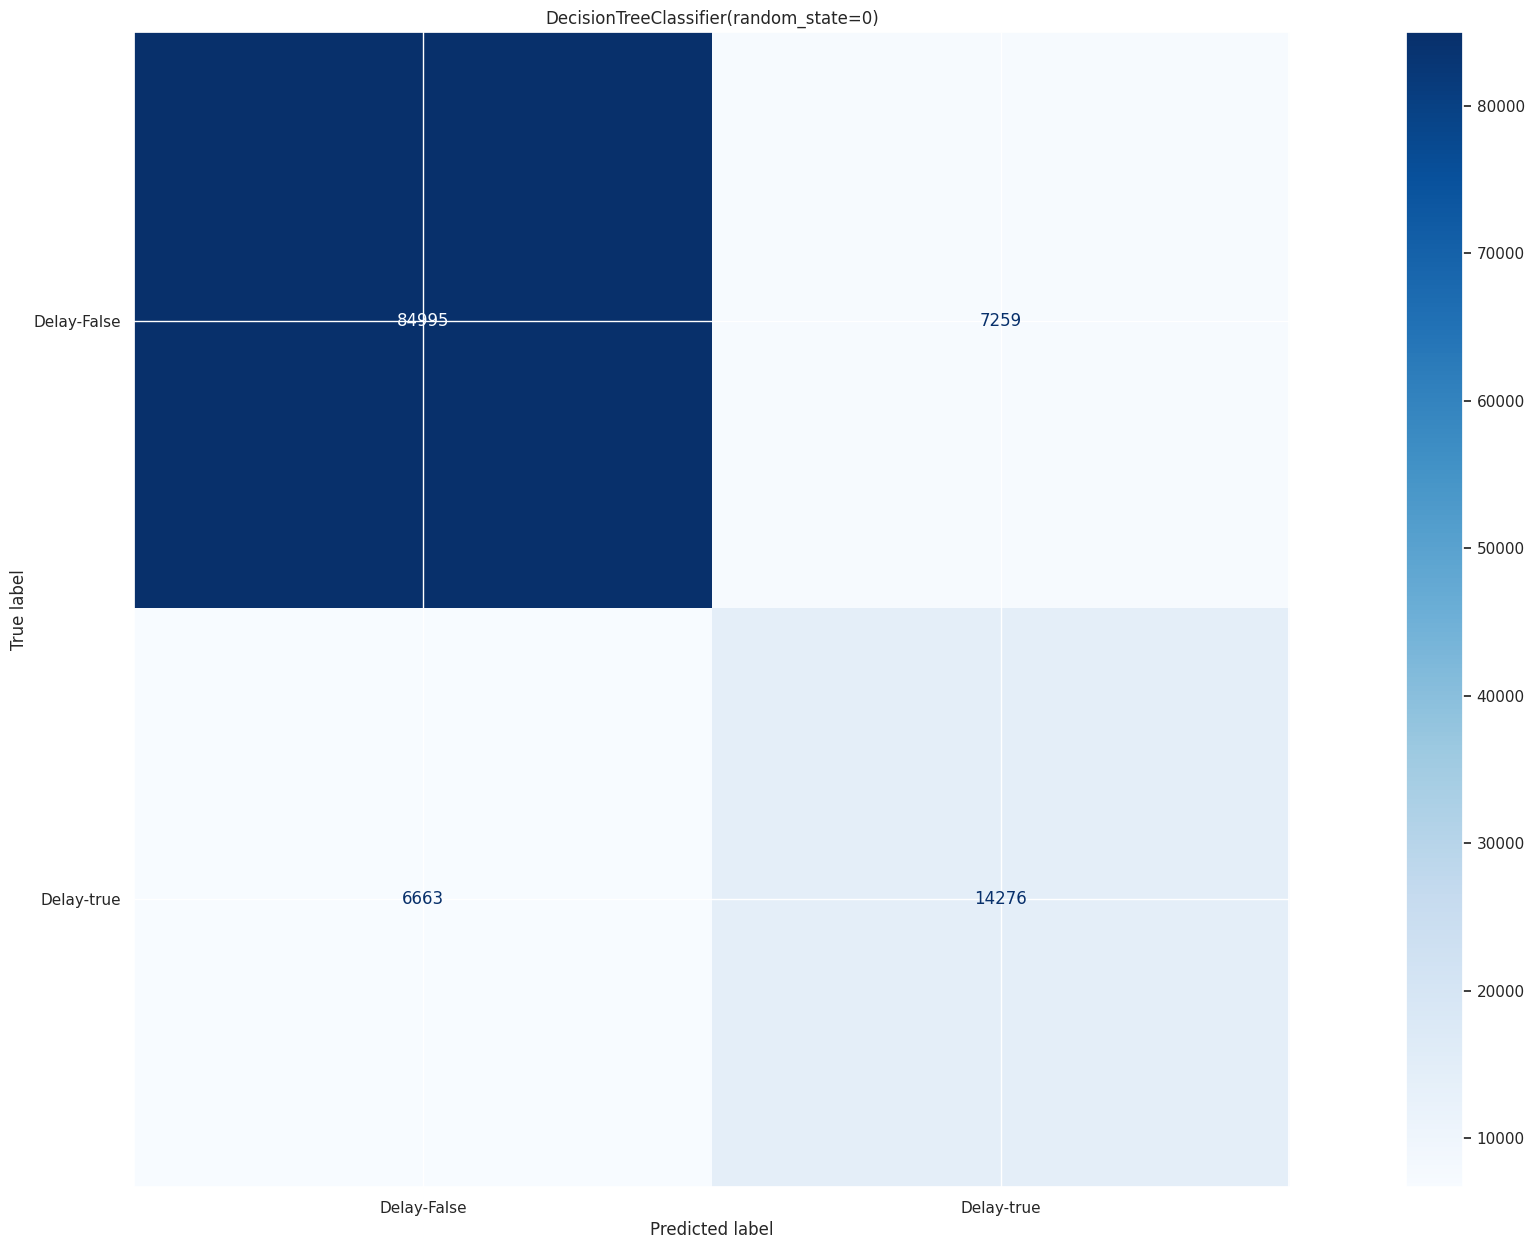

In [77]:
# Confusion Matrix of Decision Tree

class_names=['Delay-False','Delay-true']

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format='d', cmap='Blues')

precision = precision_score(y_test, clf.predict(x_test), average='binary')
recall = recall_score(y_test, clf.predict(x_test), average='binary')
print('Avg Precision:' +  str(precision))
print('Avg Recall:' + str(recall))

disp.ax_.set_title(clf)
plt.show()

In [78]:
# Classification Report of Decision Tree Model

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     92254
           1       0.66      0.68      0.67     20939

    accuracy                           0.88    113193
   macro avg       0.80      0.80      0.80    113193
weighted avg       0.88      0.88      0.88    113193



In [79]:
# Here, we are using the confusion_matrix function to generate a 2x2 confusion matrix so that we can use the TP, FP, TN and FN values to find the specificity.

confusion_mat_dt = confusion_matrix(y_test,y_pred_dt)
specificity_dt = confusion_mat_dt[1][1]/(confusion_mat_dt[1][0]+confusion_mat_dt[1][1])

In [80]:
y_test.shape

(113193,)

In [81]:
# Storing the "macro" values of precision, recall and f1 score of the Decision Tree

precision_dt,recall_dt,fscore_dt,support_dt=score(y_test,y_pred_dt,average='macro')

In [82]:
print(precision_dt,recall_dt,fscore_dt)

0.7951133404665488 0.801552513122819 0.7982618797749387


In [83]:
# This is a dataframe of the Precision, Recall and F1 score from the Decision Tree that we have obtained above.

data =[['Decision Tree',accuracy_dt, 1-accuracy_dt, precision_dt,recall_dt, specificity_dt,fscore_dt]]
df_dt=pd.DataFrame(data,columns=['Model Name','Accuracy','Error','Precision (PPV)','Sensitivity / Recall','Specificity','F1 Score'])
df_dt

,Model Name,Accuracy,Error,Precision (PPV),Sensitivity / Recall,Specificity,F1 Score
0,Decision Tree,0.877007,0.122993,0.795113,0.801553,0.68179,0.798262


**MODEL 2 - NAIVE BAYES**

In [84]:
# Importing the library for Naive Bayes model

from sklearn.naive_bayes import GaussianNB

In [85]:
# Fitting the Training Dataset on the Naive Bayes Model

GN_nb = GaussianNB()
model_naive = GN_nb.fit(x_train, y_train)

In [86]:
# Computing y_pred values in order to find accuracy of the model

y_pred_naive = model_naive.predict(x_test)

In [87]:
# The Naive Bayes model gives us an accuracy of 91.75 %

accuracy_naive = accuracy_score(y_test,y_pred_naive)
accuracy_naive

0.9174948980944051

Avg Precision:0.7961903789194158
Avg Recall:0.7445914322555997


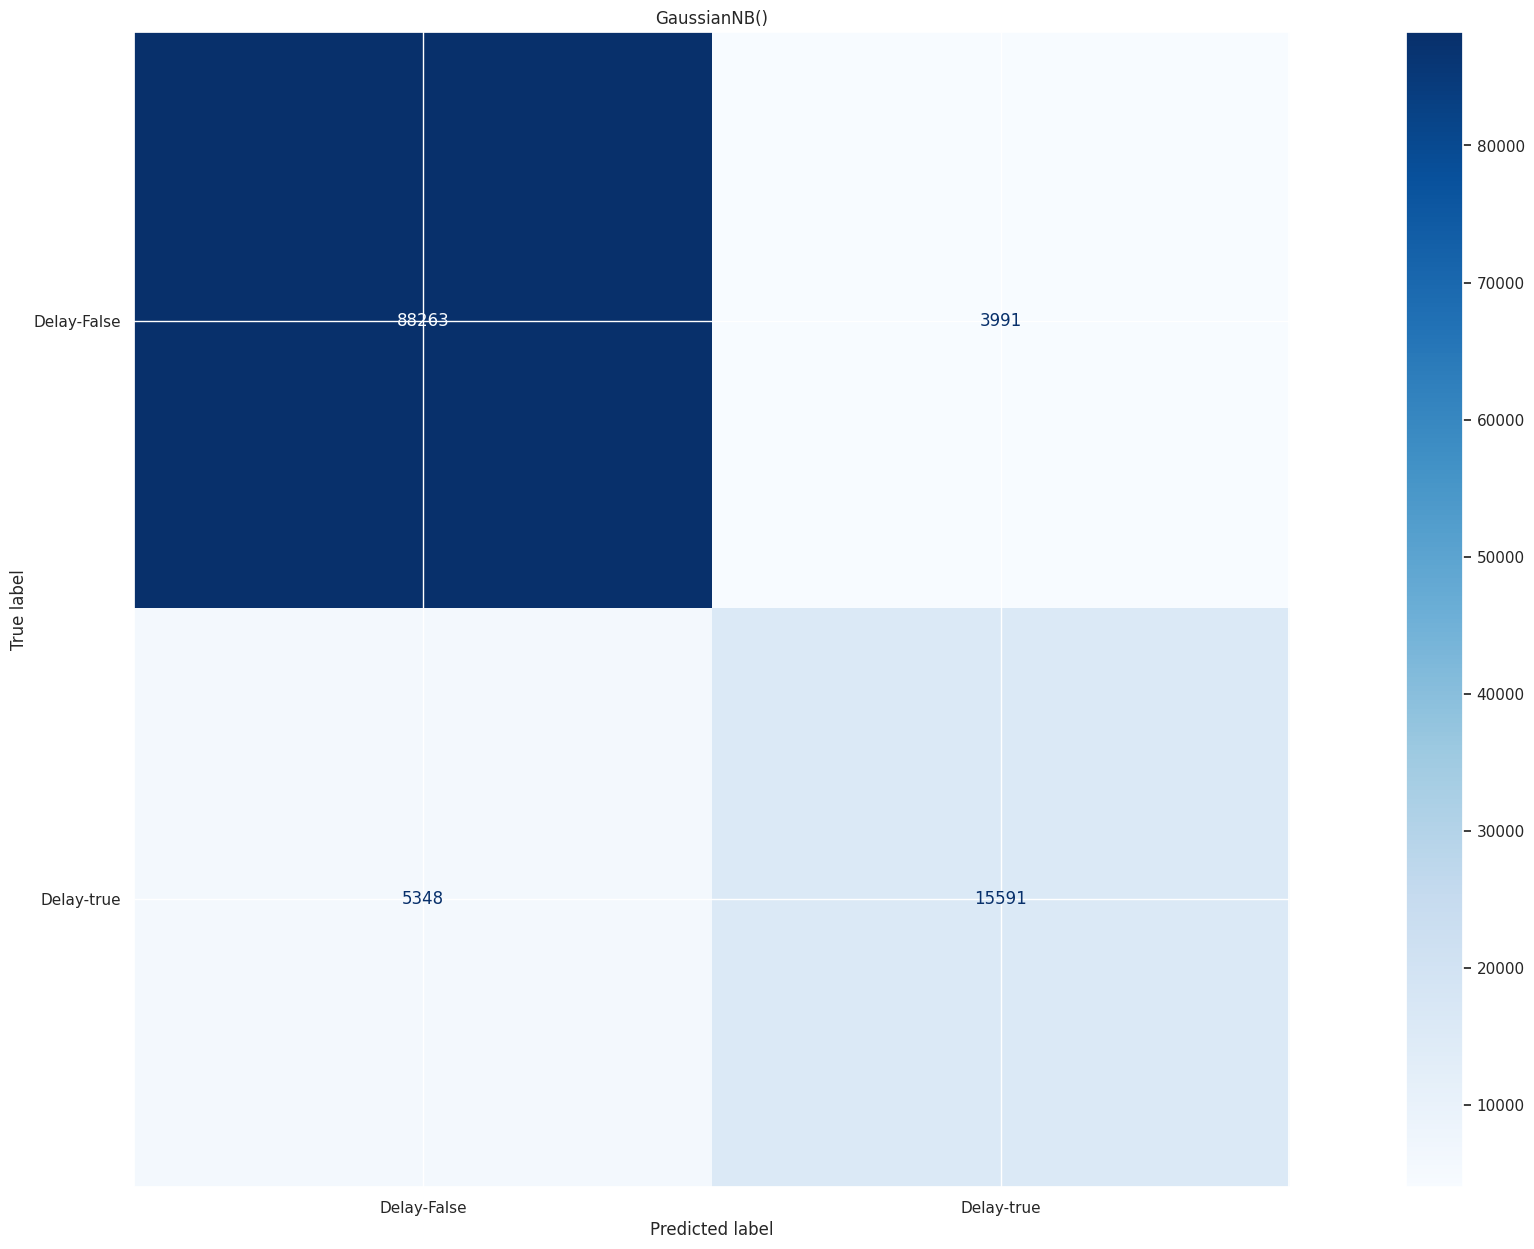

In [88]:
# Printing the Confusion Matrix of the Naive Bayes Model

class_names=['Delay-False','Delay-true']

cm = confusion_matrix(y_test, y_pred_naive)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format='d', cmap='Blues')

precision = precision_score(y_test, model_naive.predict(x_test), average='binary')
recall = recall_score(y_test,model_naive.predict(x_test), average='binary')
print('Avg Precision:' +  str(precision))
print('Avg Recall:' + str(recall))

disp.ax_.set_title(model_naive)
plt.show()

In [89]:
# Here, we are using the confusion_matrix function to generate a 2x2 confusion matrix so that we can use the TP, FP, TN and FN values to find the specificity.

confusion_mat_naive = confusion_matrix(y_test,y_pred_naive)
specificity_naive = confusion_mat_naive[1][1]/(confusion_mat_naive[1][0]+confusion_mat_naive[1][1])

In [90]:
# Classification Report of Naive Bayes Model

print(classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     92254
           1       0.80      0.74      0.77     20939

    accuracy                           0.92    113193
   macro avg       0.87      0.85      0.86    113193
weighted avg       0.92      0.92      0.92    113193



In [91]:
# Storing the "macro" values of precision, recall and f1 score of the Naive Bayes model

precision_naive ,recall_naive,fscore_naive, support_naive=score(y_test,y_pred_naive,average='macro')

In [92]:
# This is a dataframe of the Precision, Recall and F1 score from the classification report that we have obtained above.

data =[['Naive Bayes Model',accuracy_naive, 1-accuracy_naive, precision_naive,recall_naive, specificity_naive,fscore_naive]]
df_naive=pd.DataFrame(data,columns=['Model Name','Accuracy','Error','Precision (PPV)','Sensitivity / Recall','Specificity','F1 Score'])
df_naive

,Model Name,Accuracy,Error,Precision (PPV),Sensitivity / Recall,Specificity,F1 Score
0,Naive Bayes Model,0.917495,0.082505,0.86953,0.850665,0.744591,0.85964


**MODEL 3 - Multi-layer Perceptron (MLP) Classifier**

In [93]:
# Importing libraries necessary for MLP Classifier

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [94]:
# Finding cross validation scores of the dataset

Model3 = MLPClassifier()
cv3 = cross_val_score(Model3,x_train,y_train,cv=2)

In [95]:
cv3

array([0.91685845, 0.91870928])

In [96]:
# Fitting the Training Dataset on the MLP Classifier

model_mlp = Model3.fit(x_train, y_train)

In [97]:
# Computing y_pred values in order to find accuracy of the model

y_pred_mlp = model_mlp.predict(x_test)

In [98]:
# The Naive Bayes model gives us an accuracy of 91.97% , which is the best accuracy we obtain amongst all our models.
# This makes the MLP model the best model for our dataset

accuracy_mlp = accuracy_score(y_test,y_pred_mlp)
accuracy_mlp

0.9196681773607909

Avg Precision:0.8156240008526058
Avg Recall:0.7309804670710158


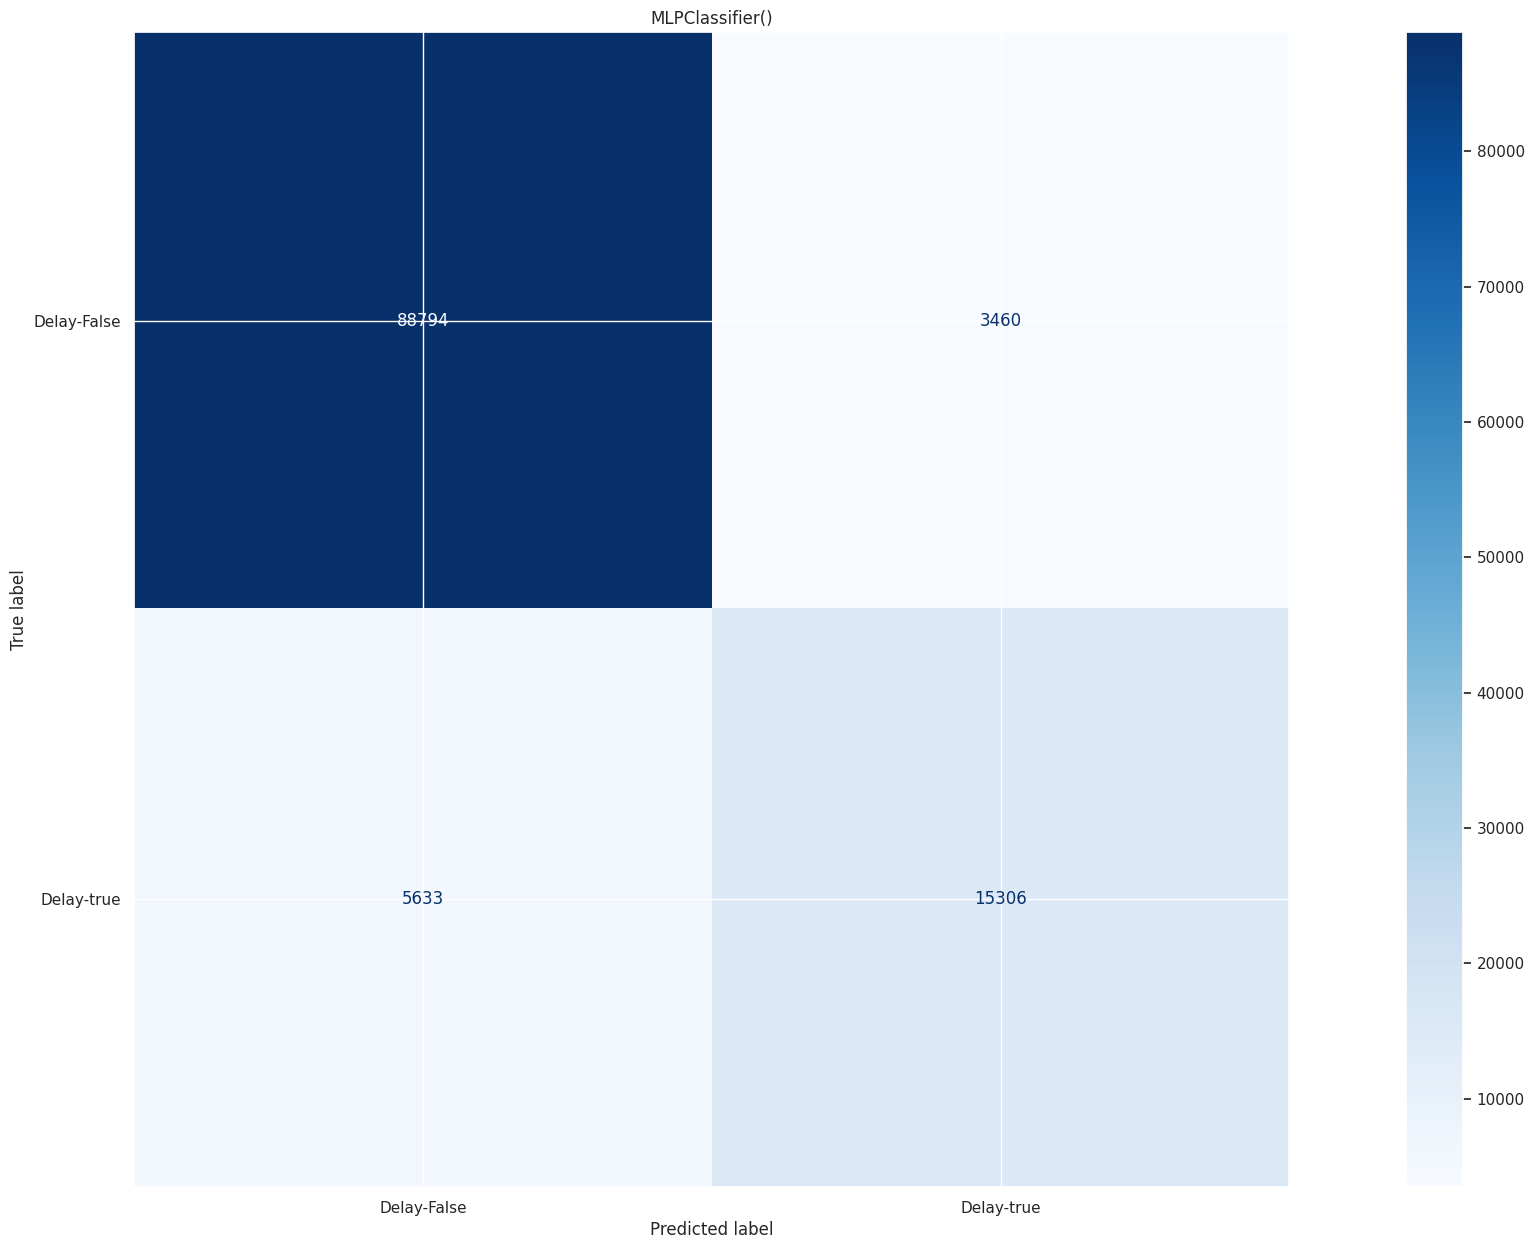

In [99]:
# Printing the Confusion Matrix of the MLP Classifier

class_names=['Delay-False','Delay-true']

cm = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format='d', cmap='Blues')

precision = precision_score(y_test, model_mlp.predict(x_test), average='binary')
recall = recall_score(y_test, model_mlp.predict(x_test), average='binary')
print('Avg Precision:' +  str(precision))
print('Avg Recall:' + str(recall))

disp.ax_.set_title(model_mlp)
plt.show()

In [100]:
# Here, we are using the confusion_matrix function to generate a 2x2 confusion matrix so that we can use the TP, FP, TN and FN values to find the specificity.

confusion_mat_mlp = confusion_matrix(y_test,y_pred_mlp)
specificity_mlp = confusion_mat_mlp[1][1]/(confusion_mat_mlp[1][0]+confusion_mat_mlp[1][1])

In [101]:
# Classification report of the MLP Classifier

print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     92254
           1       0.82      0.73      0.77     20939

    accuracy                           0.92    113193
   macro avg       0.88      0.85      0.86    113193
weighted avg       0.92      0.92      0.92    113193



In [102]:
# Storing the "macro" values of precision, recall and f1 score of the MLP Classifier

precision_mlp,recall_mlp,fscore_mlp,support_mlp = score(y_test,y_pred_mlp,average='macro')

In [103]:
# This is a dataframe of the Precision, Recall and F1 score from the Classification Report that we have obtained above.

data =[['MLP Classifier',accuracy_mlp, 1-accuracy_mlp, precision_mlp,recall_mlp, specificity_mlp,fscore_mlp]]
df_mlp=pd.DataFrame(data,columns=['Model Name','Accuracy','Error','Precision (PPV)','Sensitivity / Recall','Specificity','F1 Score'])
df_mlp

,Model Name,Accuracy,Error,Precision (PPV),Sensitivity / Recall,Specificity,F1 Score
0,MLP Classifier,0.919668,0.080332,0.877985,0.846738,0.73098,0.861139


**MODEL 4 - Logistic Regression Model**

In [104]:
# Load the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [105]:
logistic_model = LogisticRegression() # making a logistic regression model
logistic_model.fit(x_train, y_train) # training the model
y_pred_log = logistic_model.predict(x_test) # model uses the learnt parameters from training data to predict the labels of tets data.
accuracy_log = accuracy_score(y_test,y_pred_log) # finds the accuracy of the model using the test data and the predicted data obtained in the above step
confusion_mat = confusion_matrix(y_test,y_pred_log) # creates a confusion matrix

In [106]:
# The Naive Bayes model gives us an accuracy of 91.75 %

print("Accuracy is",accuracy_log)

Accuracy is 0.9174948980944051


In [107]:
# Printing the Confusion Matrix of the Logistic Regression Model

print("Confusion Matrix\n",confusion_mat)

Confusion Matrix
 [[88263  3991]
 [ 5348 15591]]


In [108]:
# Here, we use the FP, TN and FN values to find the specificity.

specificity_log = confusion_mat[1][1]/(confusion_mat[1][0]+confusion_mat[1][1])

Avg Precision:0.7961903789194158
Avg Recall:0.7445914322555997


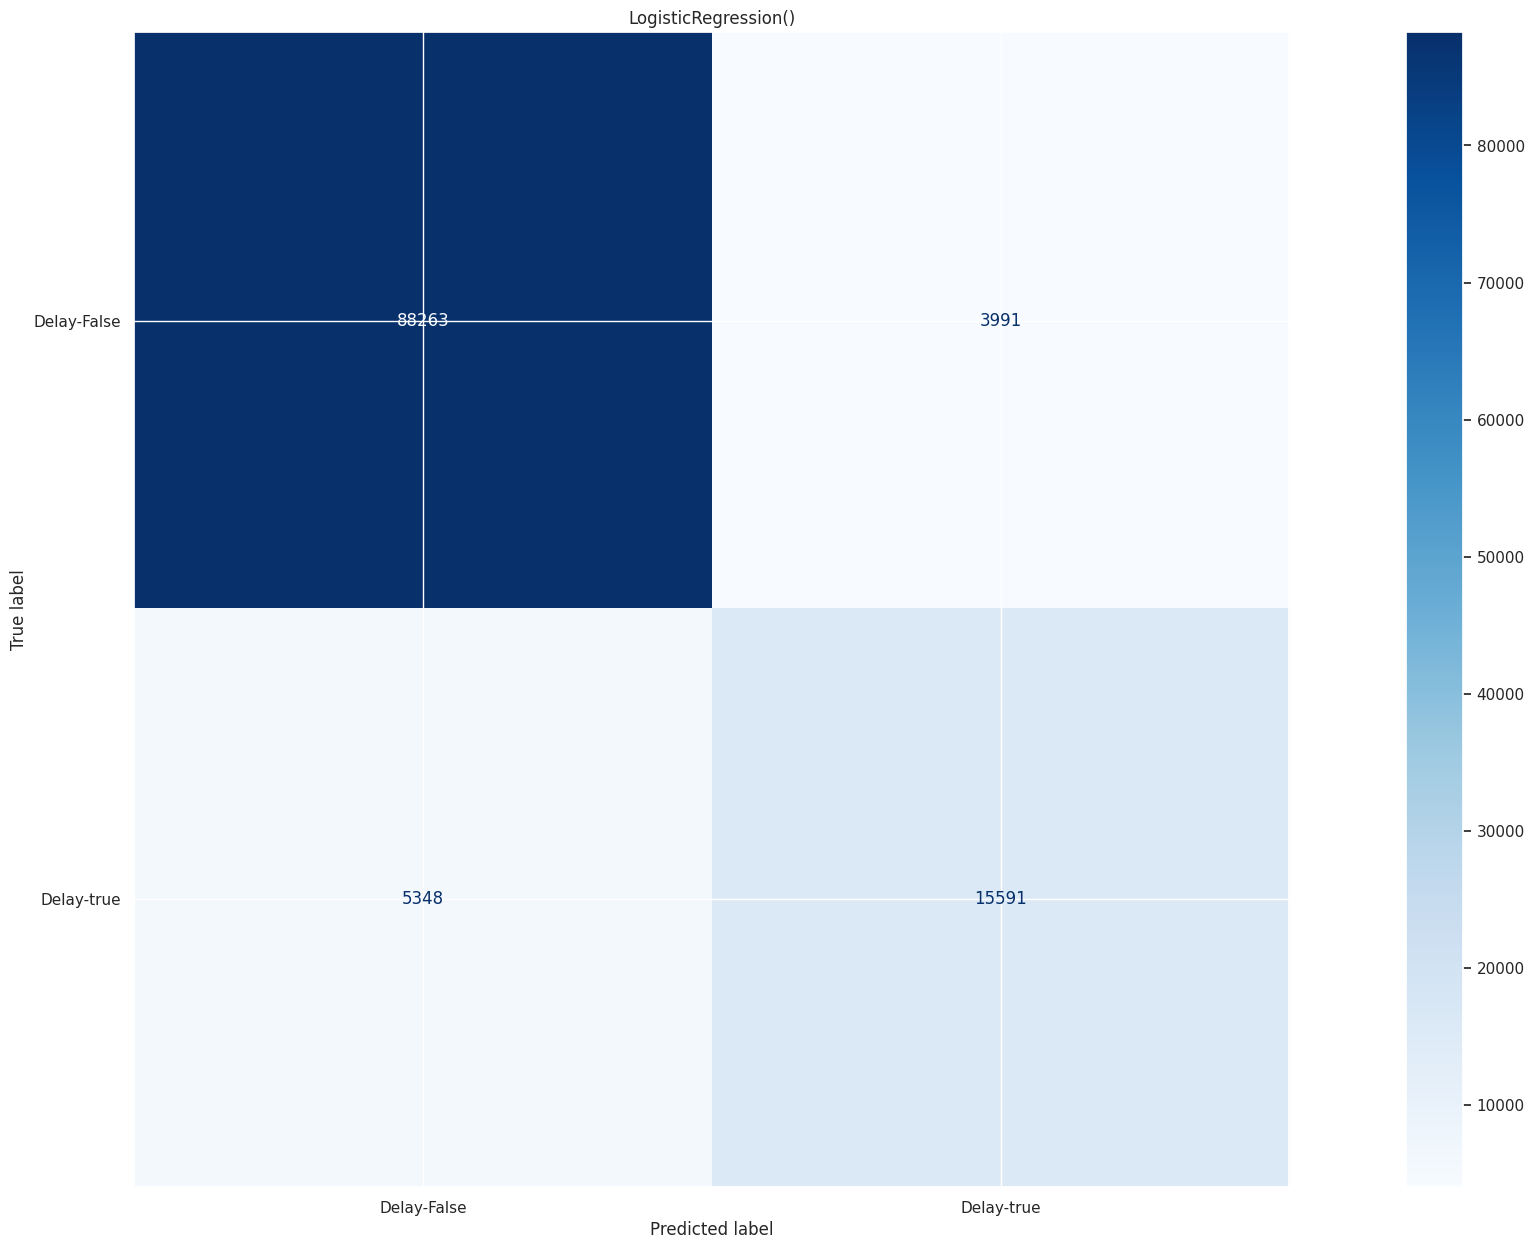

In [109]:
# Printing the Confusion Matrix of the Logistic Regression Model

class_names=['Delay-False','Delay-true']
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format='d', cmap='Blues')

precision = precision_score(y_test, logistic_model.predict(x_test), average='binary')
recall = recall_score(y_test,logistic_model.predict(x_test), average='binary')
print('Avg Precision:' +  str(precision))
print('Avg Recall:' + str(recall))

disp.ax_.set_title(logistic_model)
plt.show()

In [110]:
# Classification report of the Logistic Regression Model

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     92254
           1       0.80      0.74      0.77     20939

    accuracy                           0.92    113193
   macro avg       0.87      0.85      0.86    113193
weighted avg       0.92      0.92      0.92    113193



In [111]:
# Storing the "macro" values of precision, recall and f1 score of the Logistic Regression Model

precision_log,recall_log,fscore_log,support_log=score(y_test,y_pred_log,average='macro')

In [112]:
# This is a dataframe of the Precision, Recall and F1 score from the Classification Report that we have obtained above.

data =[['Logistic Regression Model',accuracy_log, 1-accuracy_log, precision_log,recall_log, specificity_log,fscore_log]]
df_dt=pd.DataFrame(data,columns=['Model Name','Accuracy','Error','Precision (PPV)','Sensitivity / Recall','Specificity','F1 Score'])
df_dt

,Model Name,Accuracy,Error,Precision (PPV),Sensitivity / Recall,Specificity,F1 Score
0,Logistic Regression Model,0.917495,0.082505,0.86953,0.850665,0.744591,0.85964


**Model 5 - Random Forest Classifier**

In [113]:
# Importing libraries required for Random Forest Classifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import math
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Fitting the Training Dataset on the Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(x_train,y_train)

Y_train_pred = rfc.predict(x_train)
Y_test_pred = rfc.predict(x_test)     # Computing y_pred values in order to find accuracy of the model

accuracy_train_forest = accuracy_score(y_train,Y_train_pred)
accuracy_test_forest = accuracy_score(y_test,Y_test_pred)

print('ACCURACY train: %.4f, test: %.4f' %(accuracy_score(y_train,Y_train_pred), accuracy_score(y_test,Y_test_pred)))

# The Random Forest model gives us an accuracy of 91.88 % which is the second highest accuracy, which makes the Random Forest Classifier the second-best model to train our dataset.

ACCURACY train: 0.9965, test: 0.9188


Avg Precision:0.8207985143918292
Avg Recall:0.7177038062944744


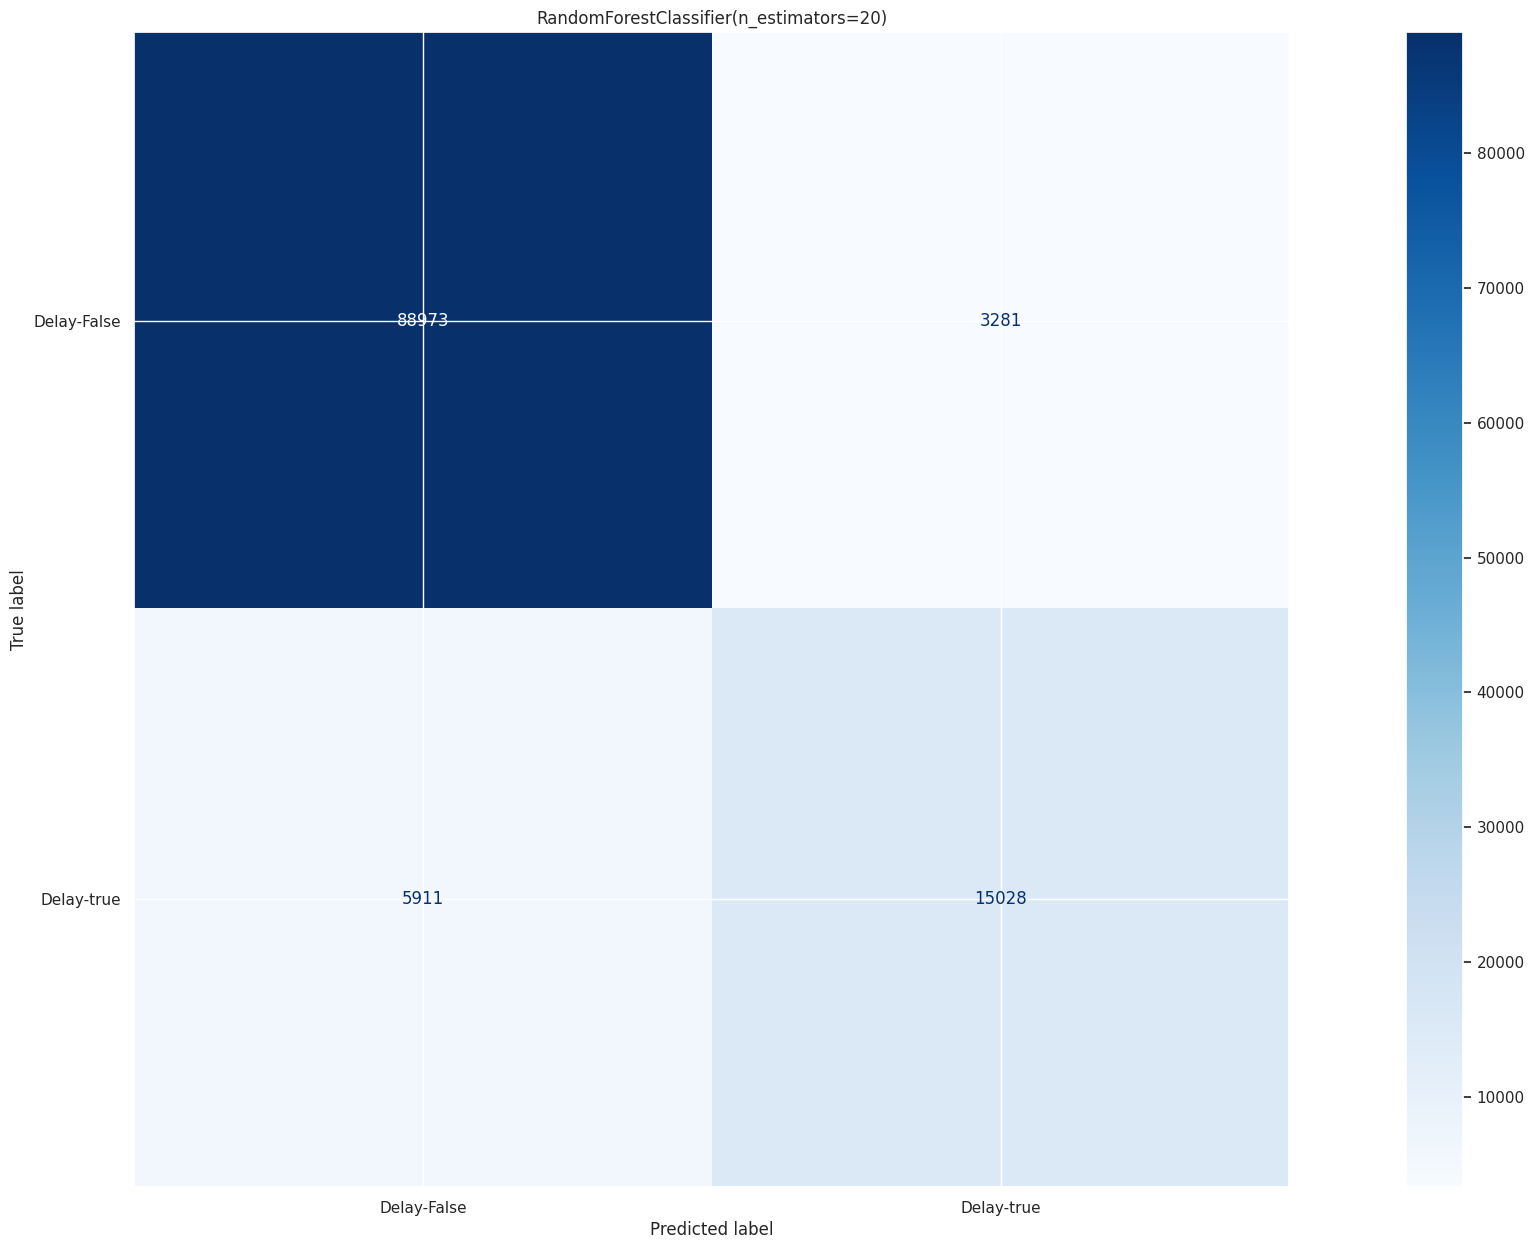

In [115]:
# Printing the Confusion Matrix of the Random Forest Classifier

class_names=['Delay-False','Delay-true']

cm = confusion_matrix(y_test, Y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format='d', cmap='Blues')

precision = precision_score(y_test, rfc.predict(x_test), average='binary')
recall = recall_score(y_test,rfc.predict(x_test), average='binary')
print('Avg Precision:' +  str(precision))
print('Avg Recall:' + str(recall))

disp.ax_.set_title(rfc)
plt.show()

In [116]:
# Here, we are using the confusion_matrix function to generate a 2x2 confusion matrix so that we can use the TP, FP, TN and FN values to find the specificity.

confusion_mat_rf = confusion_matrix(y_test,Y_test_pred)
specificity_rf = confusion_mat_rf[1][1]/(confusion_mat_rf[1][0]+confusion_mat_rf[1][1])

In [117]:
# Classification report of the Random Forest Classifier

print(classification_report(y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     92254
           1       0.82      0.72      0.77     20939

    accuracy                           0.92    113193
   macro avg       0.88      0.84      0.86    113193
weighted avg       0.92      0.92      0.92    113193



In [118]:
# Storing the "macro" values of precision, recall and f1 score of the Random Forest classifier

precision_rf,recall_rf,fscore_rf,support_rf=score(y_test,Y_test_pred,average='macro')

In [119]:
# This is a dataframe of the Precision, Recall and F1 score from the Classification Report that we have obtained above.

data =[['Random forest Classifier',accuracy_test_forest, 1-accuracy_test_forest, precision_rf,recall_rf, specificity_rf,fscore_rf]]
df_rf=pd.DataFrame(data,columns=['Model Name','Accuracy','Error','Precision (PPV)','Sensitivity / Recall','Specificity','F1 Score'])
df_rf

,Model Name,Accuracy,Error,Precision (PPV),Sensitivity / Recall,Specificity,F1 Score
0,Random forest Classifier,0.918794,0.081206,0.879251,0.841069,0.717704,0.858339


**Evaluating Performance**

This is a dataframe of the model names and their respective computed accuracies.

In [120]:
data =[['Decision Tree', accuracy_dt], ['Naive Bayes', accuracy_naive], ['MLP Classifier', accuracy_mlp], ['Logistic Regression', accuracy_log], ['Random Forest Classifier', accuracy_test_forest]]
df1=pd.DataFrame(data,columns=['Model Name','Accuracies'])
df1

,Model Name,Accuracies
0,Decision Tree,0.877007
1,Naive Bayes,0.917495
2,MLP Classifier,0.919668
3,Logistic Regression,0.917495
4,Random Forest Classifier,0.918794


**From the above dataframe, we observe that the best fitting model for our dataset is the MLP Classifier with an accuracy of 91.97 % and the second best model is the Random Forest Classifier with an accuracy of 91.88 %.**

**We also observe that the Decision Tree model has the lowest accuracy of 87.70 %.**

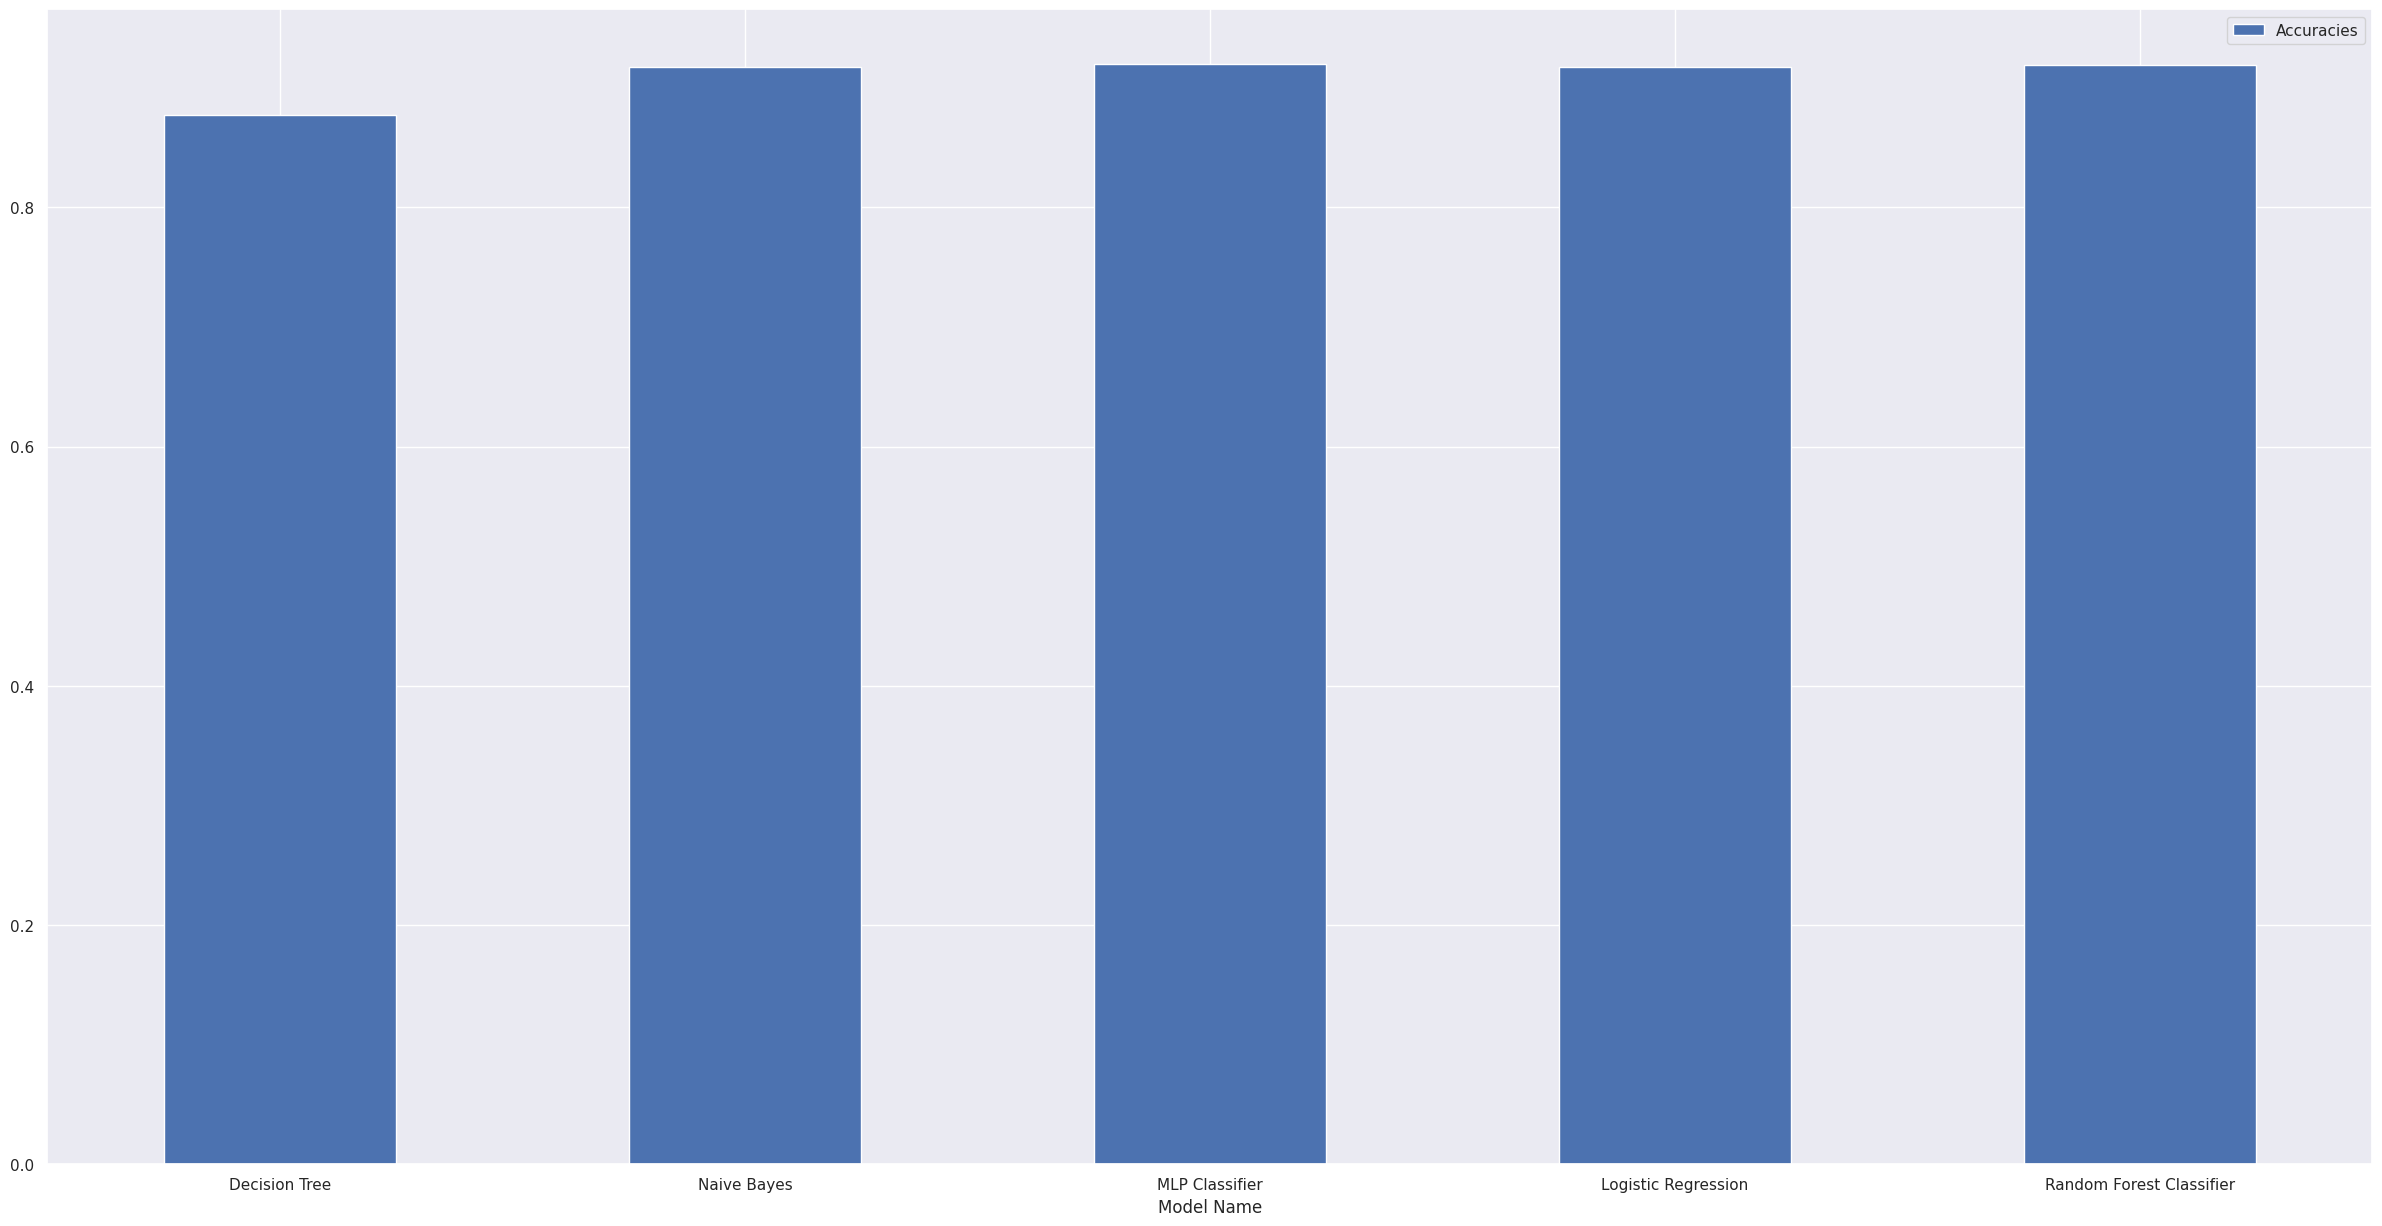

In [121]:
# This is a bar chart plotted to compare the accuracies of all five models.
# The best fitting model for our dataset is the MLP Classifier with an accuracy of 91.91 % and the second best model is the Random Forest Classifier with an accuracy of 91.86 %.
# We also observe that the Decision Tree model has the lowest accuracy of 87.7 %.

ax=df1.plot.bar(x='Model Name',y='Accuracies', rot=0)

In [122]:
# This is a dataframe of the models with their corresponding Precision, Recall and F1 score that we compute from their respective classification reports.

data =[['Decision Tree',precision_dt,recall_dt,fscore_dt], ['Naive Bayes',precision_naive,recall_naive,fscore_naive], ['MLP Classifier',precision_mlp,recall_mlp,fscore_mlp], ['Logistic Regression',precision_log,recall_log,fscore_log], ['Random Forest Classifier', precision_rf,recall_rf,fscore_rf]]
df2=pd.DataFrame(data,columns=['Model Name','Precision','Recall','F1 Score'])
df2

,Model Name,Precision,Recall,F1 Score
0,Decision Tree,0.795113,0.801553,0.798262
1,Naive Bayes,0.869530,0.850665,0.859640
2,MLP Classifier,0.877985,0.846738,0.861139
3,Logistic Regression,0.869530,0.850665,0.859640
4,Random Forest Classifier,0.879251,0.841069,0.858339


We observe that the Naive Bayes model and Logistic Regression Model have almost similar values, while the decision tree has comparitively lower values of the three parameters.

Since the MLP Classifier has the highest accuracy along with good scores of Precision, Recall and also the hightst F1 score amongst all models, it is the best fit for our dataset.

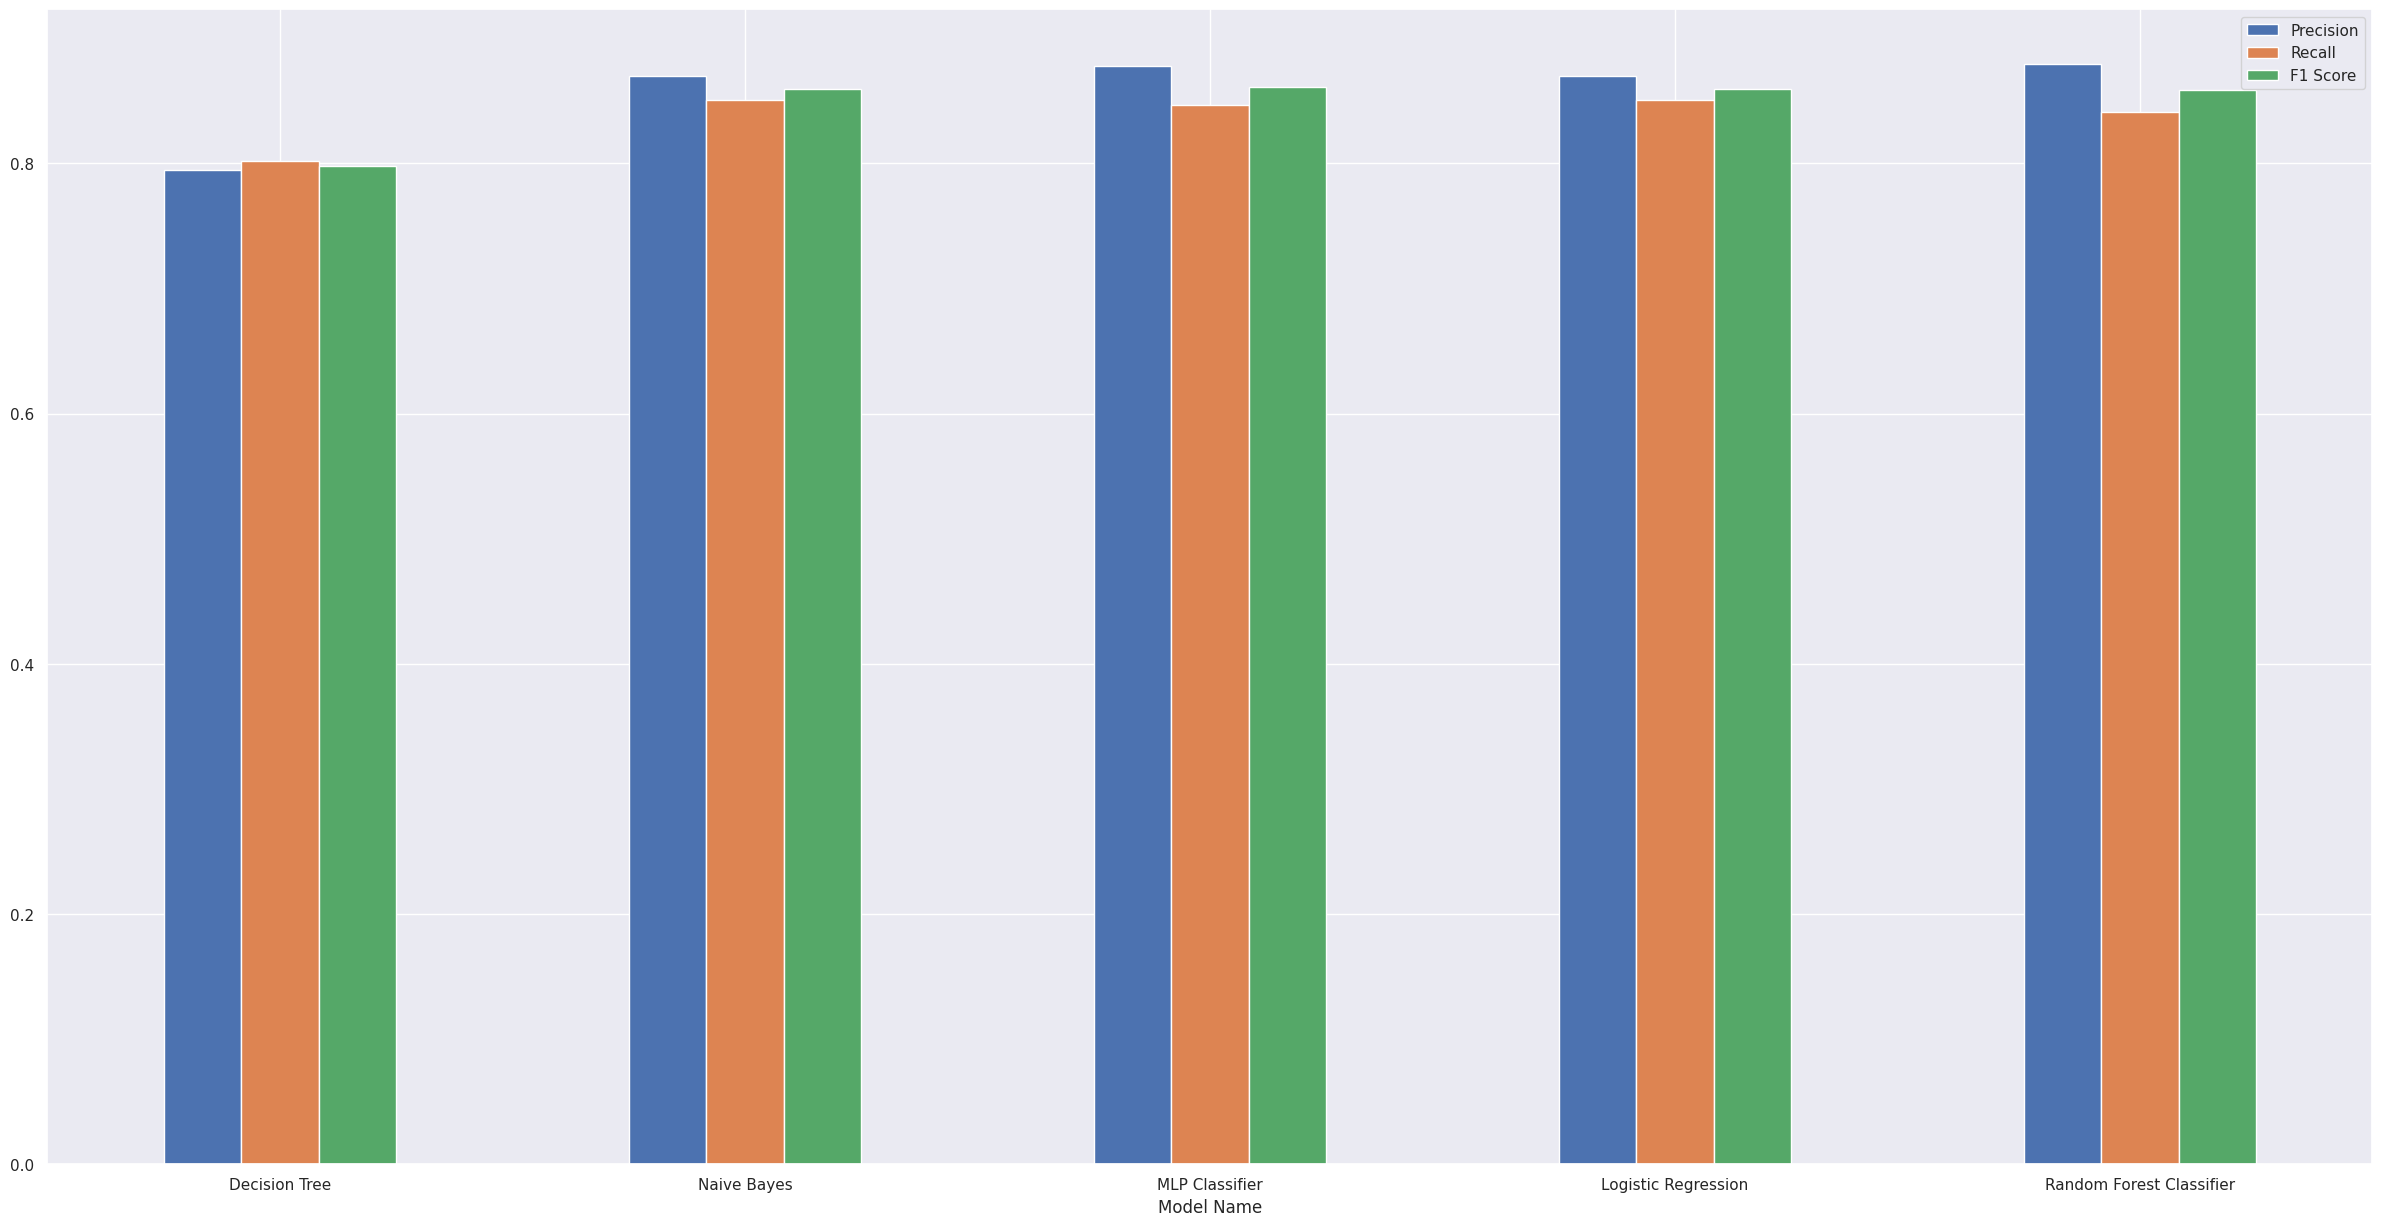

In [123]:
# Grouped bar chart of the five models and their precision, recall and F1 scores

ax=df2.plot.bar(x='Model Name',rot=0)

**Therefore, we conclude that the Multi- Layer Perceptron (MLP) Classifier model is the best fitting classification model for our dataset.**